<a href="https://colab.research.google.com/github/shashankm10/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX MOVIES AND TV SHOWS CLUSTERING**

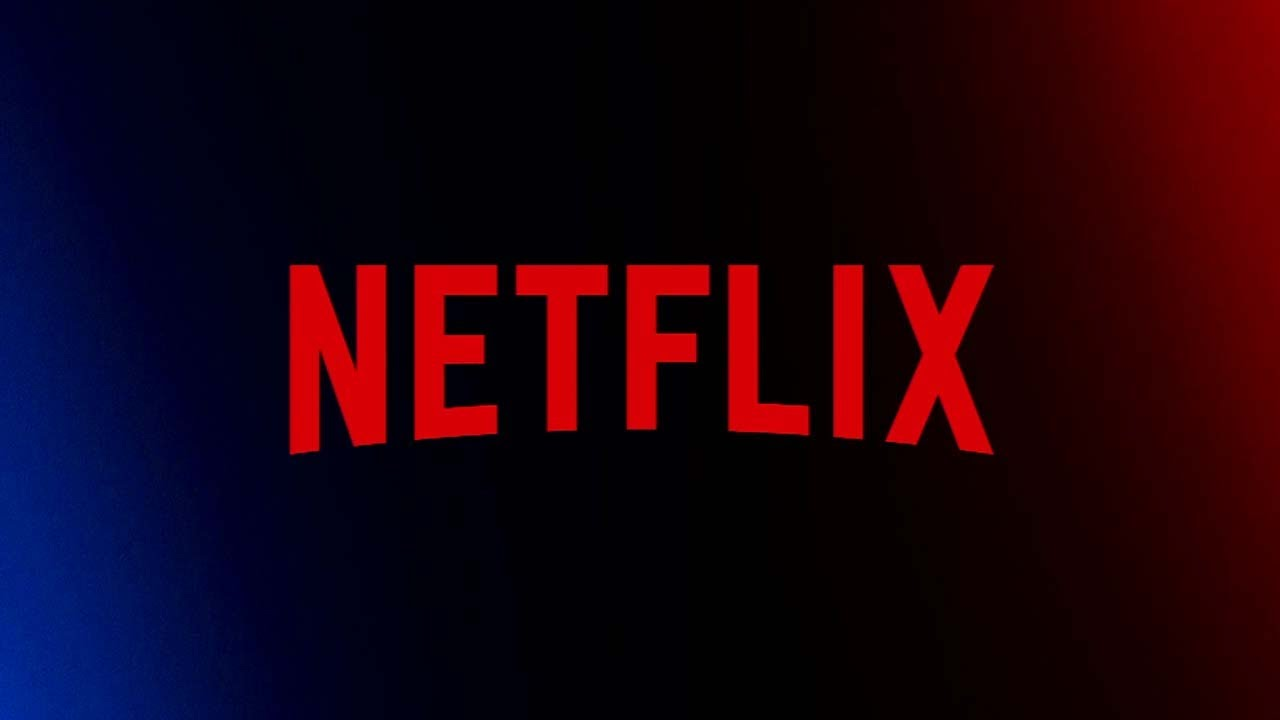

Netflix is a popular American subscription-based streaming service that provides a vast library of movies, television series, documentaries, and other forms of visual entertainment. It was founded in 1997 by Reed Hastings and Marc Randolph and has since grown to become one of the world's leading streaming platforms.

Netflix offers a wide range of content, including original productions and licensed content from various studios and distributors. Subscribers can access the service through the Netflix website or mobile applications on various devices, such as smartphones, tablets, smart TVs, gaming consoles, and streaming media players.

The platform has revolutionized the way people consume media by offering a convenient and on-demand way to watch TV shows and movies. Users can stream content instantly without having to wait for traditional television schedules or physical media like DVDs. Netflix's extensive library, personalized recommendations, and the ability to binge-watch entire series have contributed to its widespread popularity across the globe.

We have a given dataset which consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings. There are following attributes in the dataset

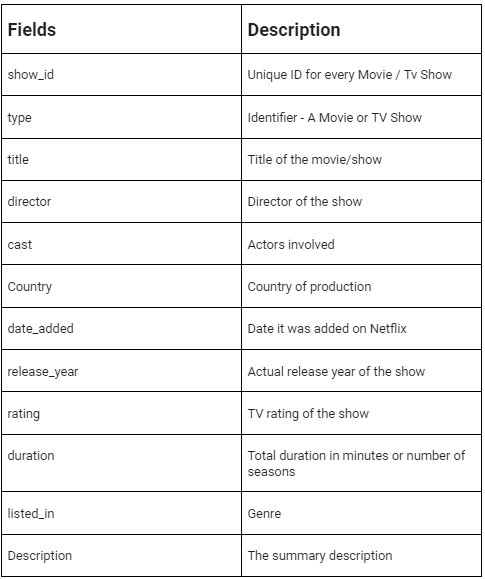

## **Loading Dataset and Importing Modules**

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
sns.color_palette("Spectral", as_cmap=True)


# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Mount the drive and import the datset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Shashank_ML/Unsupervised_netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
#copying data to preserve orignal file
df1=df.copy()

## **Data Understanding**
We need to look the data first in order to process the data

In [5]:
#checking the head of the data
df1.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [6]:
#checking the tail of the data
df1.tail(5)

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [7]:
#Getting the shape of dataset with rows and columns
print(df1.shape)

(7787, 12)


In [8]:
#Getting all the columns
print("Features of the dataset:")
df1.columns

Features of the dataset:


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
#check details about the data set
#df.info() gives the summary of the dataframe including data types, shape and memory storage.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


[Text(0, 0, '7787'),
 Text(0, 0, '2'),
 Text(0, 0, '7787'),
 Text(0, 0, '4049'),
 Text(0, 0, '6831'),
 Text(0, 0, '681'),
 Text(0, 0, '1565'),
 Text(0, 0, '73'),
 Text(0, 0, '14'),
 Text(0, 0, '216'),
 Text(0, 0, '492'),
 Text(0, 0, '7769')]

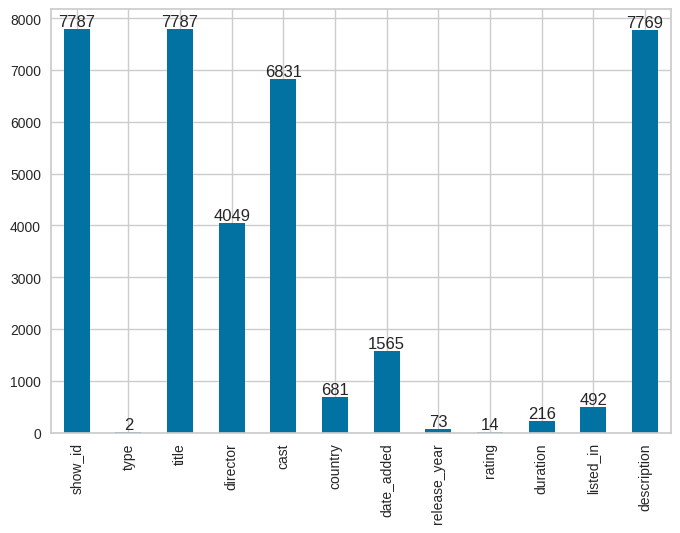

In [10]:
#print the unique value
ax=df1.nunique().plot(kind="bar")
ax.bar_label(ax.containers[0])


In [11]:
#Looking for the description of the dataset to get insights of the data
#to know more about the characteristics of the dataset We are using the df.describe() which by default gives statistical information of all numerical features in our data frame.
df1.describe(include='all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Checking for Null/Missing Value

In [12]:
# checking if there are missing values in the datset
df1.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '30.6793'),
 Text(0, 0, '9.2205'),
 Text(0, 0, '6.51085'),
 Text(0, 0, '0.128419'),
 Text(0, 0, '0'),
 Text(0, 0, '0.0898934'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

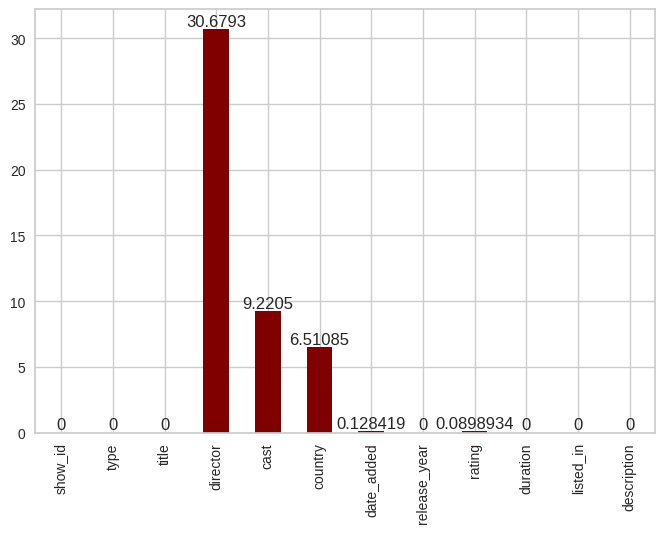

In [13]:

ax=(df1.isnull().sum()/len(df)*100).plot(kind='bar',color='maroon')
ax.bar_label(ax.containers[0])


Nan Values are more in Director , Cast and Country Columns

*   **Director** column has highest NaN values 30.7% data is missing

*   **cast** column has 9% NaN values


*  **country** , date_added , rating this columns also containing missing values

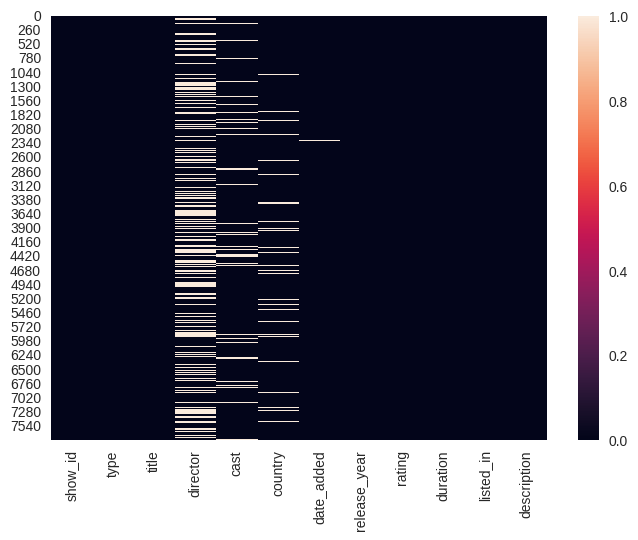

In [14]:
sns.heatmap(df1.isnull());


**Since director have many null values if we drop them, we loss a lot data so, we replacing them with unknown.**


In [15]:
# Dealing with null values
df1['director'].fillna('Unknown', inplace=True)
df1['cast'].fillna('Unknown', inplace=True)
df1['country'].fillna('Unknown', inplace=True)

# Droping some columns too
df1.dropna(subset=['date_added','rating'],inplace=True)

In [16]:
df1.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [17]:
# Dataset Rows & Columns count
df1.shape

(7770, 12)

## TV shows and Movies

In [18]:
# count of different content type - movies or tv shows
type_count = df1['type'].value_counts().reset_index()
type_count.columns = ['Type (Movie / TV Show)','Total Count']
type_count

Type (Movie / TV Show)  Total Count
0                  Movie         5372
1                TV Show         2398

[Text(0, 0, '5372'), Text(0, 0, '2398')]

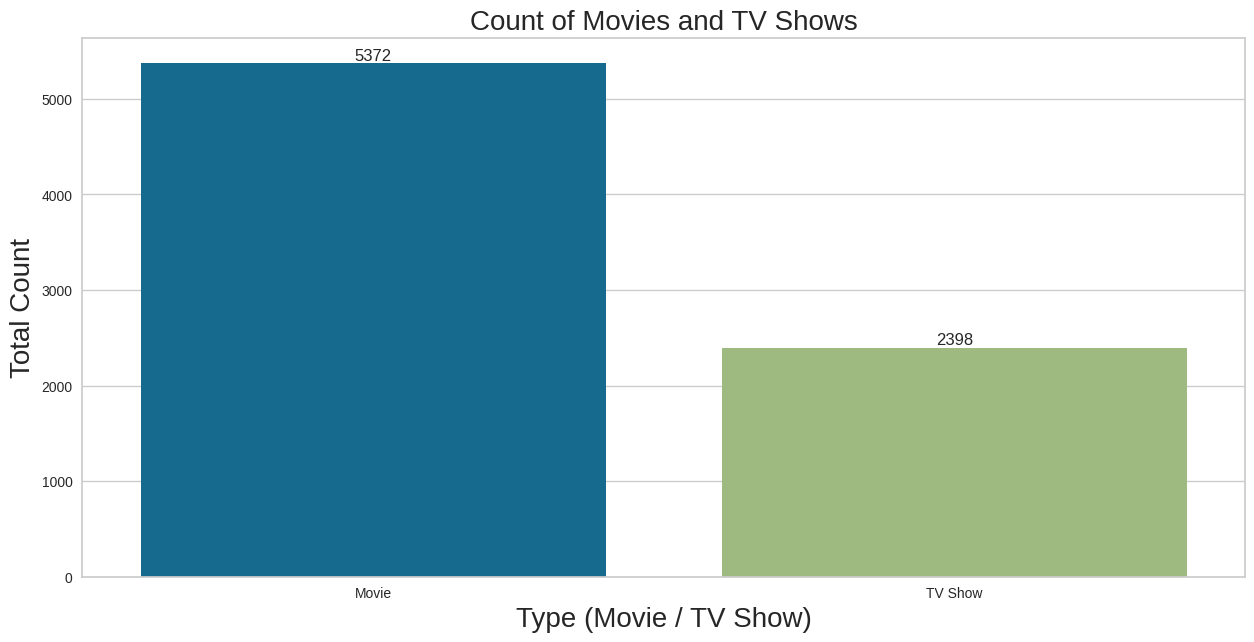

In [19]:
# count plot for TV shows and Movies
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Type (Movie / TV Show)", y="Total Count",data=type_count)
ax.set_title("Count of Movies and TV Shows", fontsize=20)
ax.set_xlabel("Type (Movie / TV Show)", fontsize=20)
ax.set_ylabel("Total Count", fontsize=20)
ax.bar_label(ax.containers[0])

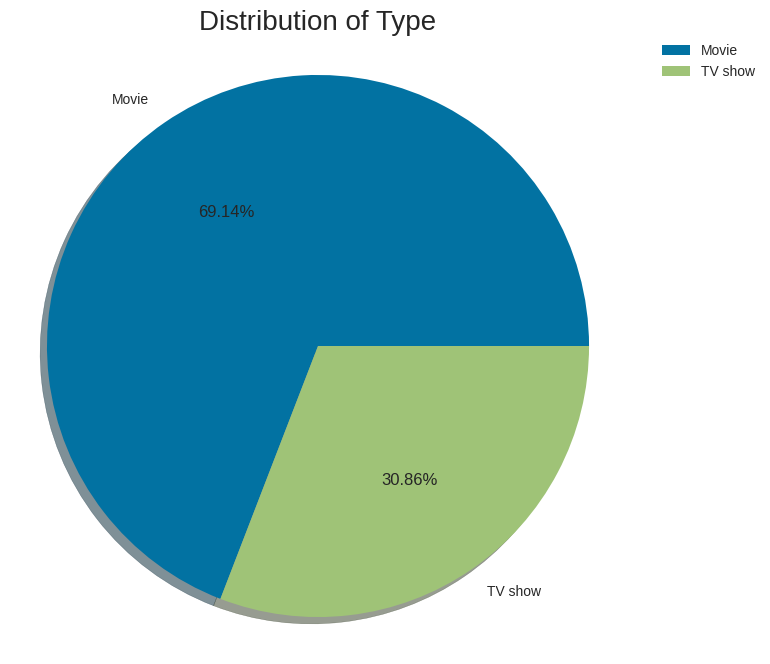

In [20]:
# pie chart for movie and tv show
type_count = df1['type'].value_counts()
labels=['Movie', 'TV show']
plt.figure(figsize=(10,8))
plt.pie(x= type_count,shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Distribution of Type", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

**It seems like Netflix has more movies than TV shows in a percentage of 69% against 31% approximately.**

## Production Growth based on type of the content & release year

In [21]:
yearly_movies=df1[df1.type=='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(10)
yearly_shows=df1[df1.type=='Movie']['release_year'].value_counts().sort_index(ascending=False).head(10)
total_contents=df['release_year'].value_counts().sort_index(ascending=False).head(10)

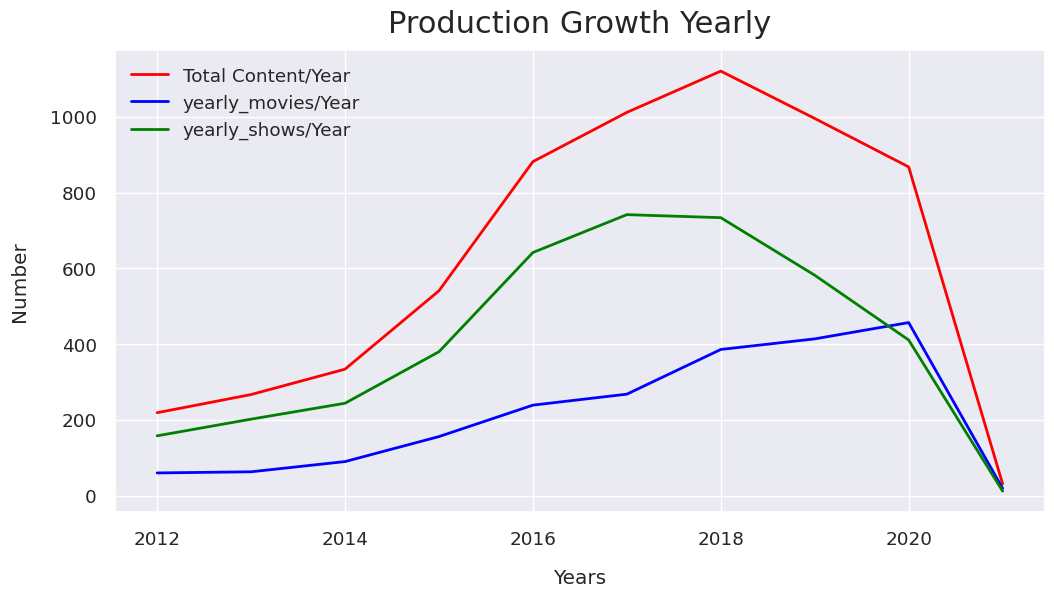

In [22]:
sns.set(font_scale=1.2)
total_contents.plot(figsize=(12,6), linewidth=2,color='red',label='Total Content/Year')
yearly_movies.plot(figsize=(12,6), linewidth=2,color='blue',label='yearly_movies/Year')
yearly_shows.plot(figsize=(12,6), linewidth=2,color='green',label='yearly_shows/Year')
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);


Year 2018 saw maximum increase in content on netflix and then there was a sudden drop in new content release around 2020 maybe due to covid

## Title

In [23]:
#number unique points
df1.title.nunique()

7770

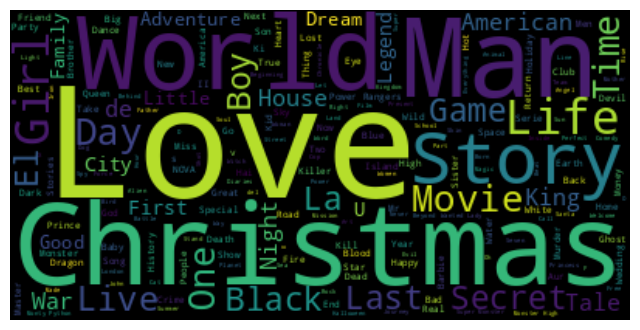

In [24]:
# text documents
text = " ".join(word for word in df1['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like words like "Love", "Man", "World", "Story" are very common in titles.
However, we are suprised by the overwhelming number of content having "Christmas" in their title.

We are suspecting "Christmas" titles to be a very seasonal thing with most of the shows likely to be released during the month of December. However, we do not have the release month in this data to conform my hypothesis.

## Top 10 directors on Netflix

In [25]:
#number of unique dir
df1.director.nunique()

4048

In [26]:
#looking at director series
df1.director

0                 Unknown
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784              Unknown
7785              Unknown
7786             Sam Dunn
Name: director, Length: 7770, dtype: object

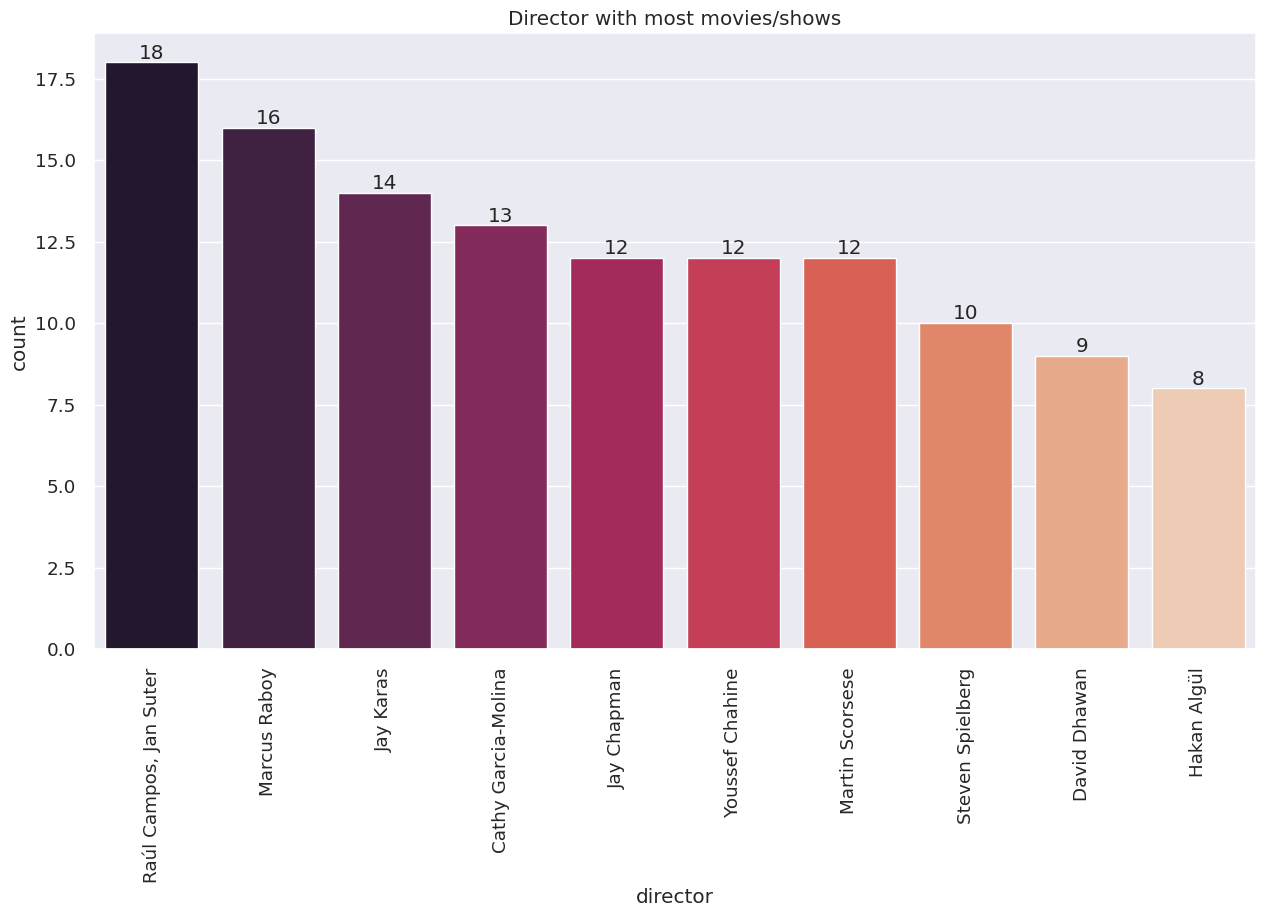

In [27]:
#plot for director
top_directors = df1.loc[df1['director'] != 'Unknown', 'director'].value_counts().nlargest(10)
plt.figure(figsize = (15,8))
ax=sns.countplot(x='director',data=df1,order=top_directors.head(10).index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Director with most movies/shows')
plt.xticks(rotation = 90)
plt.show()


Raul Campos and Jan Sulter collectively have the most content on Netflix. They have around 18 titles featured on netflix closely followed by Marcus Raboy who has 16.



### Top 10 actors on Netflix

In [28]:
actor = df1[df1.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

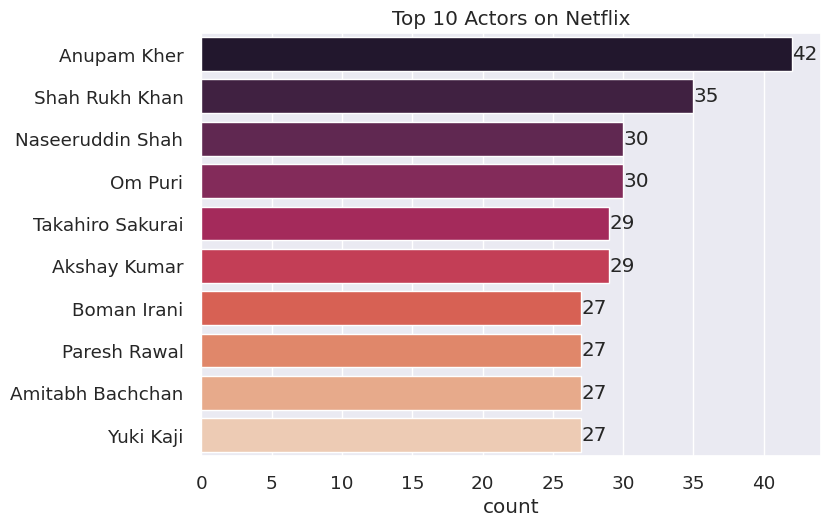

In [29]:
# Graph for top 10 actors
ax=sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Actors on Netflix')
plt.show()

* The top actor by the number of shows they appeared in is Anupam Kher, who appeared in 42 titles in the dataset.

* The second most popular actor is Shah Rukh Khan, who appeared in 35 shows.

* Most of the top 10 actors have appeared in between 25-30 shows on Netflix.

* The top 10 actors are mostly from India, with the exception of Takahiro Sakurai and Yuki Kaji from the Japan.

## Content by Country

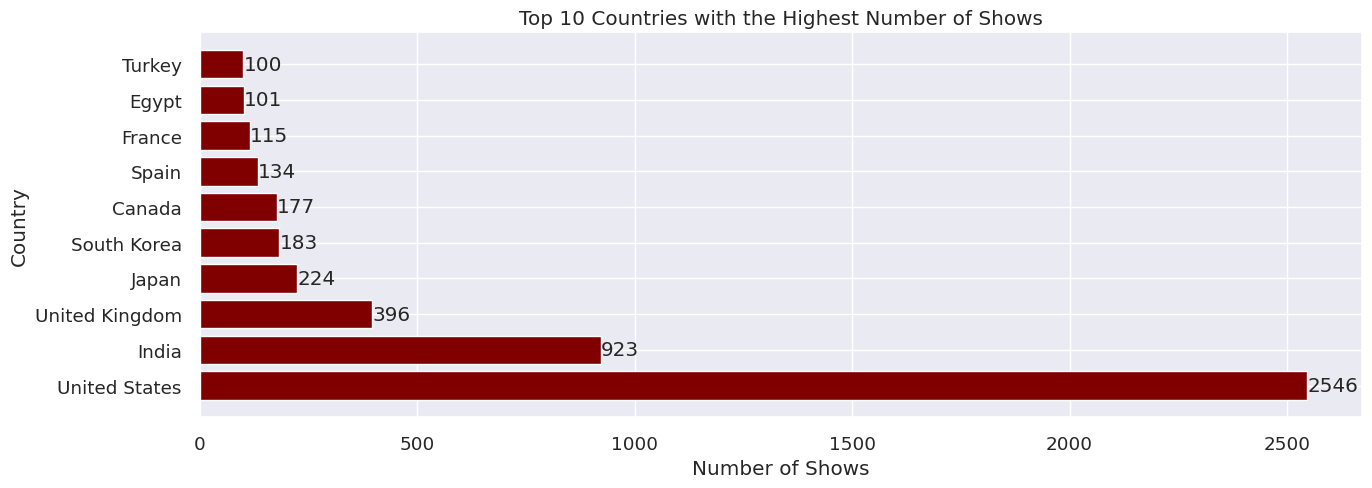

In [30]:
# Chart - 4 visualization code
top_countries = df1.loc[df1['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
plt.barh(top_countries.index, top_countries.values,color='maroon')
for index, value in enumerate(top_countries.values):
    plt.text(value, index, str(value), ha='left', va='center')
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

In [31]:
country = df1['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

The United States is by far the largest
content producer of movies and TV shows in the dataset, with pver 2500 titles contributing to 45% of all titles. The next highest content producing countries are India at 17.8%, the United Kingdom 7.68 % share in total.



In [32]:
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [33]:
df1.release_year

0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 7770, dtype: int64

## Date added

In [34]:
# Create new features to store date, day, month and year seperately.
df1["date_added"] = pd.to_datetime(df1['date_added'])  # First convert date_added to date time format.
df1['day_added'] = df1['date_added'].dt.day            # Compute day.
df1['year_added'] = df1['date_added'].dt.year          # Compute year.
df1['month_added'] = df1['date_added'].dt.month        # Compute month.

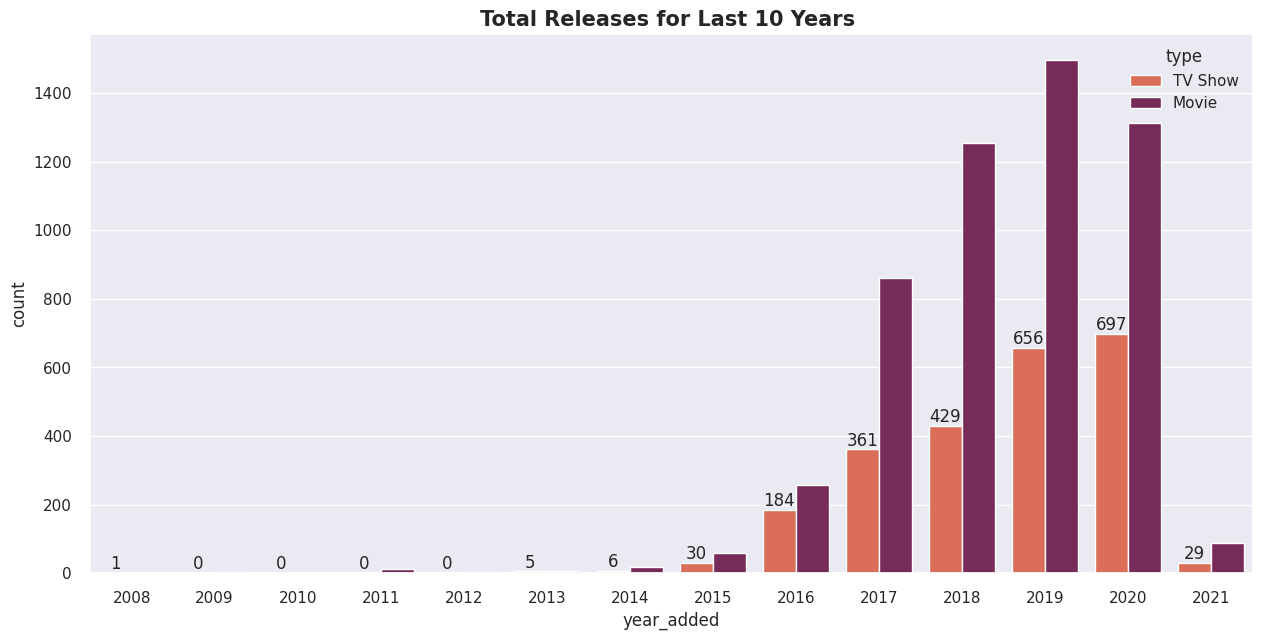

In [35]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.countplot(x='year_added',data=df1,palette="rocket_r",hue='type')
ax.bar_label(ax.containers[0])

plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")
plt.show()


*   The number of release have significantly increased till 2020 but after 2020 and have dropped in 2021 as the data which we have is till 2020 and also in covid era there were few production units which could follow the covid suite.   

*   Movie addition increased over the years but suddenly reduced in 2020 but TV show addition has increased over the year and hasn't seen decline until 2021



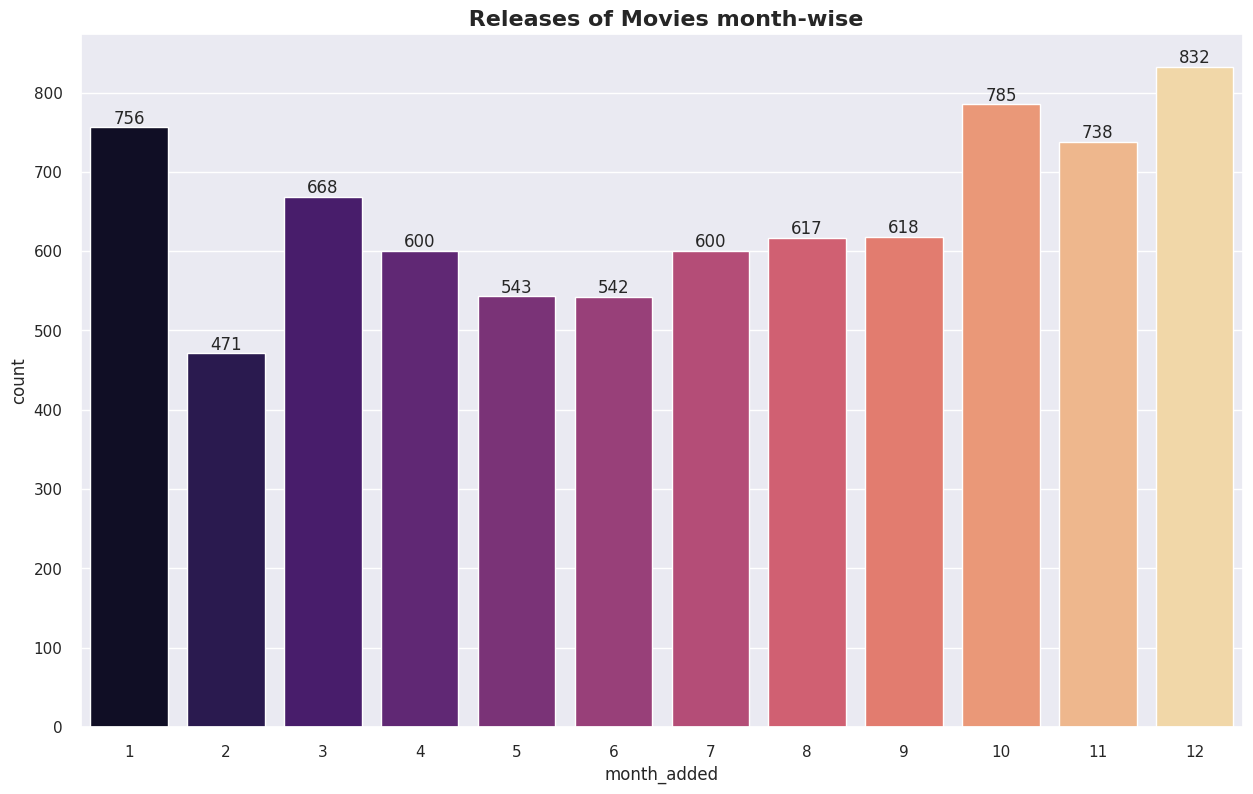

In [36]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
ax=sns.countplot(x='month_added',data=df1,palette="magma")
ax.bar_label(ax.containers[0])


plt.title(' Releases of Movies month-wise',size='16',fontweight="bold")
plt.show()

More of the content is released in holiday season - October, November, December and January

## Release Year

In [37]:
#visualisation with plotly
temp_df1 = df1['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show(renderer='colab')

<Axes: xlabel='release_year', ylabel='year_added'>

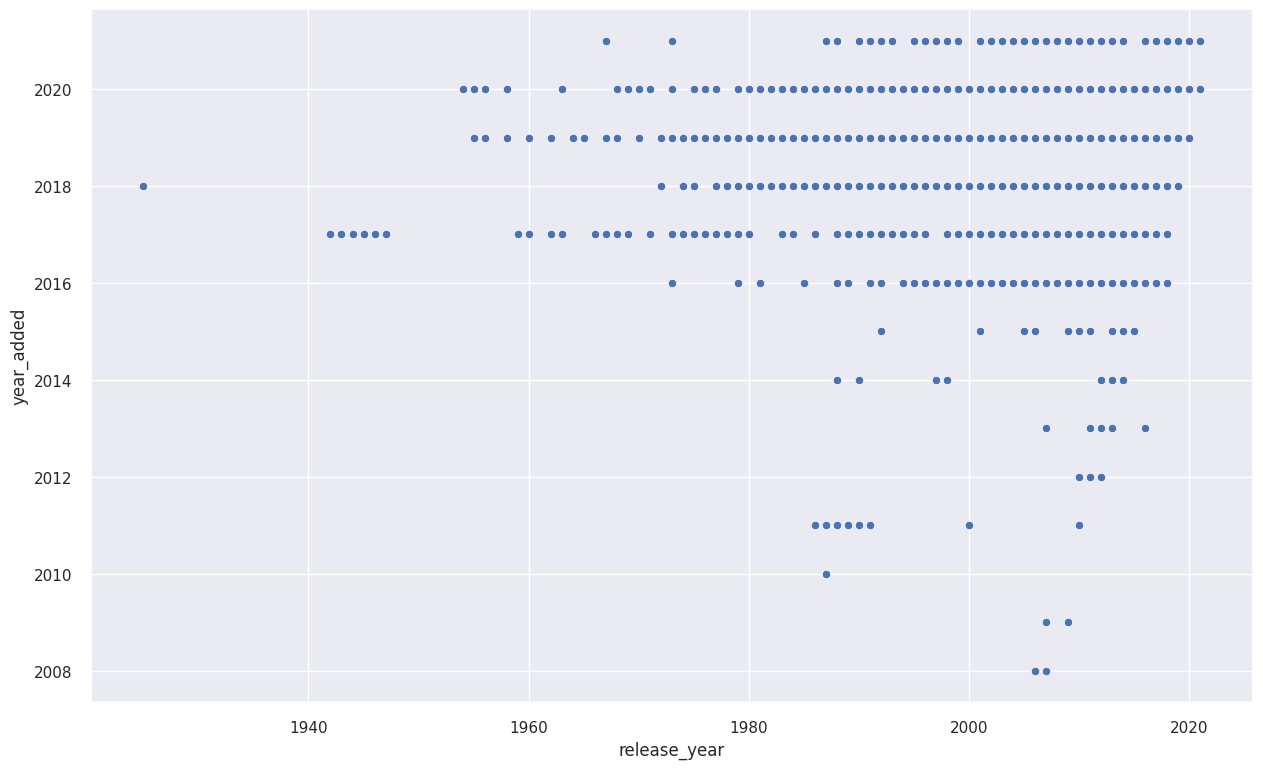

In [38]:
sns.scatterplot(data=df1, x="release_year", y="year_added")


We see a slow start for Netflix over several years
, maybe netflix was a small company back then. Things begin to pick up in 2015 and then there is a rapid increase from 2016. This rapid growth in contents on their platform which signifies there may be more investment and licencing deals

## Rating

In [39]:
#counting all type ratings
df1['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [40]:
rating = df1['rating'].value_counts().reset_index()
rating = rating[rating['rating'] /  rating['rating'].sum() > 0.01]

fig = px.pie(rating, values='rating', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

Most of the contents got ratings like:
* TV-MA (For Mature Audiences)
* TV-14 ( May be unsuitable for children under 14 )
* TV-PG ( Parental Guidance Suggested )
* NR ( Not Rated )

### Rating distribution by Content Type

In [41]:
df2 = df1[df1["type"] == "TV Show"]
df3 = df1[df1["type"] == "Movie"]

temp_df1 = df2['rating'].value_counts().reset_index()
temp_df2 = df3['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show(renderer='colab')

We observe that some ratings are only applicable to Movies. The most common rating for both Movies & TV Shows are Mature audience and under 14 years

## Duration of Content

In [42]:
#duration column
df1['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7770, dtype: object

In [43]:
#subsetting TV Show and Movie for duration
netflix_shows=df1[df1['type']=='TV Show']
netflix_movies=df1[df1['type']=='Movie']


### Netflix Show Duration Distribution

In [44]:
#netflix show duration analysis
netflix_shows['duration']=netflix_shows['duration'].str.replace('Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('Seasons','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)
netflix_shows['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2398, dtype: int64

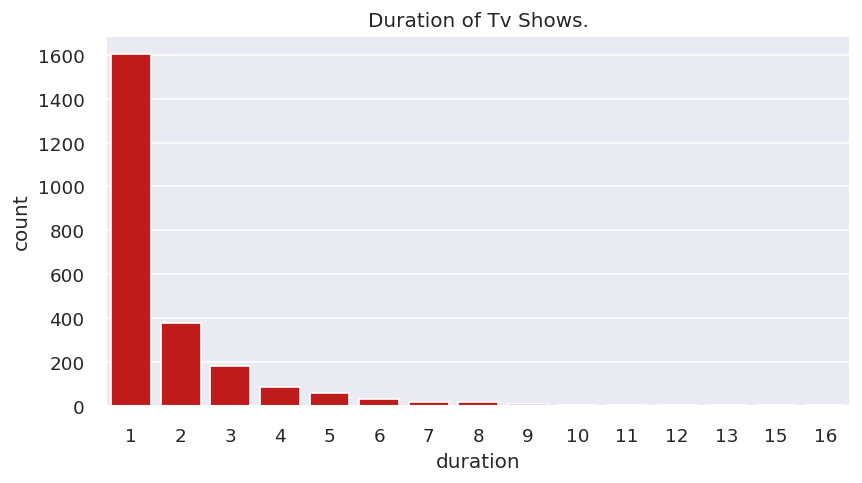

In [45]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.countplot(netflix_shows,x=netflix_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()

* ***Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.***

### Netflix Movie Duration Distribution

In [46]:
#movie duration subsetting
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5372, dtype: int64

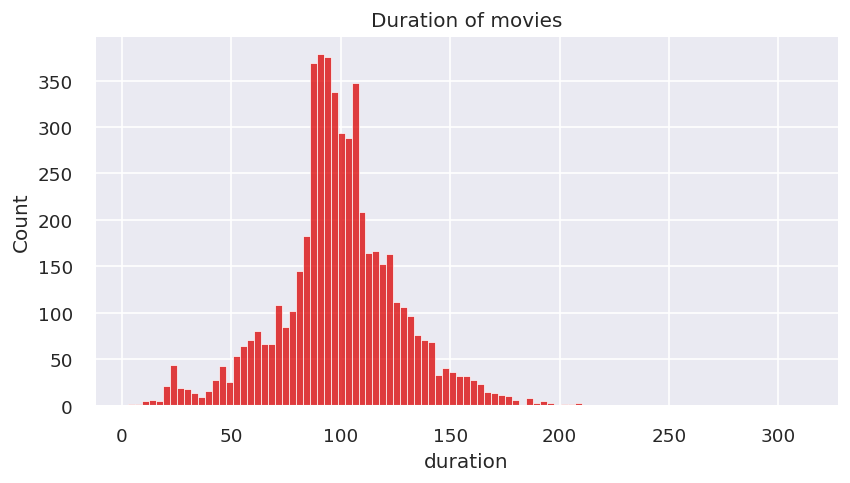

In [47]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=netflix_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

* ***Most of the movies last for 90 to 120 minutes.***

## Top Genres

In [48]:
# seperating genre from listed_in columns for analysis purpose
genres = df1['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

genre  count
0      International Movies   2437
1                    Dramas   2105
2                  Comedies   1471
3    International TV Shows   1197
4             Documentaries    786
5        Action & Adventure    721
6                 TV Dramas    703
7        Independent Movies    673
8  Children & Family Movies    532
9           Romantic Movies    531

In [49]:
# number of genres present in dataset
len(genres)

42

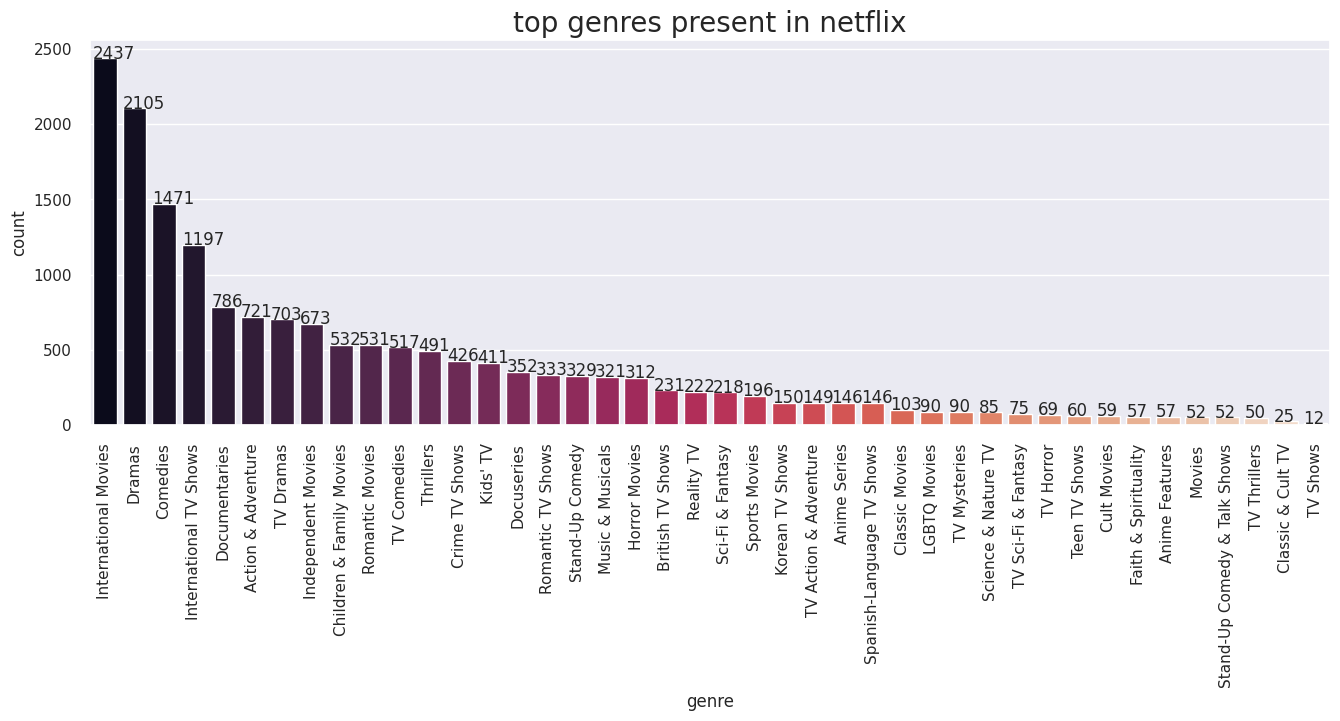

In [50]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres,palette='rocket')
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

**Obesrvation :**
1. Highest number of genre belong from International movies, Dramas, Comedies respectively.
2. Least number of  genre belong from Classic & cult TV, TV Thriller, Stand-Up comedy and TV shows.

## Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

####Expand Contraction

In [51]:
# Expand Contraction
df1['organized'] =(df1['description'].astype(str) + ' ' +
                  df1['listed_in'].astype(str)   + ' ' +
                  df1['rating'].astype(str)      + ' ' +
                  df1['cast'].astype(str)        + ' ' +
                  df1['country'].astype(str)     + ' ' +
                  df1['director'].astype(str))

In [52]:
df1.organized[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil Unknown'

#### Lower Casing

In [53]:
# Lower Casing
df1['Lower_casing']= df1['organized'].str.lower()

In [54]:
df1.Lower_casing[0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows, tv dramas, tv sci-fi & fantasy tv-ma joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil unknown'

#### Removing Punctuations

In [55]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [56]:
# Remove Punctuations
def remove_punctuation(text):
    # remove punctuation from text
    return text.translate(str.maketrans('', '', string.punctuation))

In [57]:
df1['cleaned_text'] = df1['Lower_casing'].apply(remove_punctuation)

In [58]:
df1.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tv dramas tv scifi  fantasy tvma joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil unknown'

#### Removing URLs & Removing words and digits contain digits.

In [59]:
# Remove URLs & Remove words and digits contain digits
import re

In [60]:
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]", "", str(x))

def remove_urls(text):
    cleaned_text = re.sub(r'http\S+', '', text)
    return cleaned_text

def remove_digits(text):
    cleaned_text = re.sub(r'\w*\d\w*', '', text)
    return cleaned_text

In [61]:
df1['removed_words']  = df1['cleaned_text'].apply(cleaned)
df1['removed_url']    = df1['removed_words'].apply(remove_urls)
df1['removed_digits'] = df1['removed_url'].apply(remove_digits)

#### Removing Stopwords & White spaces




In [62]:
from nltk.corpus import stopwords

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [64]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [65]:
df1['removed_stopwords'] = df1['removed_digits'].apply(remove_stopwords)
df1.removed_stopwords[0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy tvma joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil unknown'

In [66]:
# Remove White spaces
def remove_whitespaces(text):
    cleaned_text = text.strip()
    return cleaned_text

In [67]:
df1['removed_whitespaces']=df1['removed_stopwords'].apply(remove_whitespaces)
df1['removed_whitespaces'].head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
Name: removed_whitespaces, dtype: object

## NLP alorithms for preprocessing

#### Tokenization

To split paragraphs and sentences into smaller units that can be more easily assigned meaning.

In [68]:
# Tokenization
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [69]:
df1['tokenized'] = df1['removed_whitespaces'].apply(tokenize_text)

In [70]:
df1['tokenized'].head()

0    [future, elite, inhabit, island, paradise, far...
1    [devastating, earthquake, hits, mexico, city, ...
2    [army, recruit, found, dead, fellow, soldiers,...
3    [postapocalyptic, world, ragdoll, robots, hide...
4    [brilliant, group, students, become, cardcount...
Name: tokenized, dtype: object

####Text Normalization

Using this pre-processing step for improving the quality of the text and making it suitable for machines to process.

In [71]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [72]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def normalize_text(tokens):
    stemmer = SnowballStemmer('english')          # apply stemming to tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()              # apply lemmatization
    normalized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    normalized_text = ' '.join(normalized_tokens) # join normalized tokens
    return normalized_text

In [73]:
df1['normalized'] = df1['tokenized'].apply(normalize_text)

In [74]:
df1['normalized'].head()

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
Name: normalized, dtype: object

#### Text Vectorization

In [75]:
# Vectorizing Text
new_df = df1[['title', 'normalized']]
new_df.head()

title                                         normalized
0     3%  futur elit inhabit island paradis far crowd sl...
1   7:19  devast earthquak hit mexico citi trap survivor...
2  23:59  armi recruit found dead fellow soldier forc co...
3      9  postapocalypt world ragdol robot hide fear dan...
4     21  brilliant group student becom cardcount expert...

In [76]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

t_vectorizer = TfidfVectorizer(max_features=20000)
x= t_vectorizer.fit_transform(new_df['normalized'])

x.shape

(7770, 20000)

##### Which text vectorization technique have you used and why?

* We have used the TF-IDF (Term Frequency-Inverse Document Frequency) text vectorization technique. This technique is commonly used for text classification and information retrieval tasks. It assigns weights to each word in the document based on its frequency and rarity across the corpus. This helps to highlight the most important words in the document and down-weight the common words that do not provide much useful information for the analysis.

###  Dimesionality Reduction

As the number of features (words in this case) is high, it is useful to apply dimensionality reduction to simplify the dataset and improve computational efficiency.

In [77]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x.toarray())

PCA()

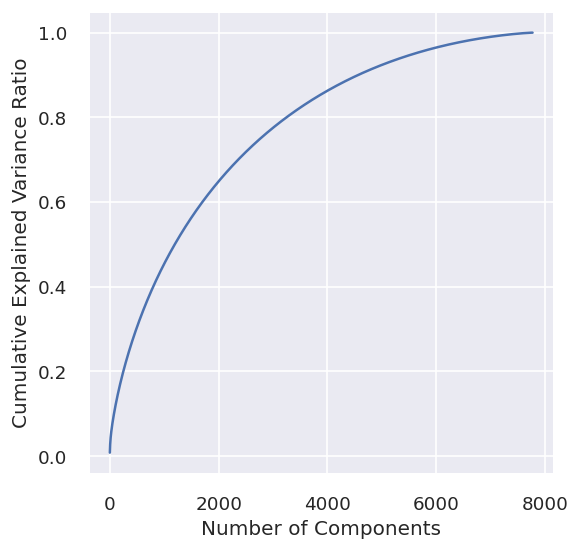

In [78]:
# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio versus the number of components
plt.figure(figsize=(5, 5), dpi=120)
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [79]:
pca_tuned = PCA(n_components=0.95)
x_dense = x.toarray()
pca_tuned.fit(x_dense)
x = pca_tuned.transform(x_dense)
print(x.shape)

(7770, 5586)


In [80]:
x

array([[ 0.09646207, -0.03009541, -0.01406246, ..., -0.00334235,
         0.00960201, -0.01388256],
       [-0.04711345, -0.04064023,  0.01200022, ..., -0.00196395,
        -0.00322872,  0.0023839 ],
       [-0.05236609, -0.05179217, -0.02627736, ..., -0.00432861,
        -0.00208939,  0.00584294],
       ...,
       [-0.0247845 ,  0.11362287,  0.27127022, ..., -0.0032603 ,
        -0.00781276, -0.0048005 ],
       [ 0.09348093,  0.00774209,  0.01693935, ...,  0.00762693,
        -0.00140219, -0.008879  ],
       [-0.06151782,  0.26616825,  0.29950512, ..., -0.00632254,
         0.00117081, -0.00975526]])

* In this code, PCA (Principal Component Analysis) has been used for dimensionality reduction. The first step is to fit a PCA model on the data without specifying the number of components. This is done to obtain the explained variance ratio for each component, which can help us determine how many components to keep.

* Next, a new PCA model is created with n_components set to 0.95, indicating that we want to keep enough components to explain 95% of the variance in the data. Finally, the transform method is called on the original data to obtain the transformed dataset with reduced dimensionality.

* Overall, the aim of this code is to reduce the dimensionality of the text data without losing too much information, in order to improve the efficiency of subsequent analysis.

##  ML Model Implementation

### Which Evaluation metrics did you consider for a positive business impact and why?

**1) Silhouette score**

* Silhouette score is a popular evaluation metric for clustering algorithms. It measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.

* Silhouette score is a useful metric for a positive business impact because it can help identify the optimal number of clusters for a dataset. This, in turn, can help companies make data-driven decisions and allocate resources more efficiently based on the distinct patterns and characteristics of each cluster.


**2) Calinski-Harabasz score**

* The Calinski-Harabasz score, also known as the variance ratio criterion, is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. It is calculated by taking the ratio of the sum of squares between groups to the sum of squares within groups, multiplied by the ratio of the number of observations to the number of clusters minus one.

* In other words, the Calinski-Harabasz score measures how well separated the clusters are in the data and how compact the clusters are internally. A higher score indicates that the clusters are well separated and compact, while a lower score indicates that the clusters are not well separated or are not compact.


**3) Davies-Bouldin score**

* The Davies-Bouldin score is a measure of the average similarity between each cluster and its most similar cluster, compared to the average dissimilarity between each cluster and its least similar cluster. It is calculated by taking the sum of the ratios of the within-cluster scatter and the between-cluster distances, divided by the number of clusters.

* In other words, the Davies-Bouldin score measures how well separated the clusters are in the data and how distinct they are from each other. A lower score indicates that the clusters are well separated and distinct, while a higher score indicates that the clusters are not well separated or are not distinct from each other.

In [81]:
from tabulate import tabulate
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.
    & Returns
    Model evaluation result
    """
    # Calculate the number of clusters and evaluation metrics
    n_clusters = len(set(y_predict))
    S_score = silhouette_score(X, y_predict)
    CH_score = calinski_harabasz_score(X, y_predict)
    DB_score = davies_bouldin_score(X, y_predict)

    # Print the evaluation results
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {S_score:.4f}")
    print(f"Calinski-Harabasz score: {CH_score:.4f}")
    print(f"Davies-Bouldin score: {DB_score:.4f}")

    # Create a dictionary to store the evaluation scores
    scores_dict = {"silhouette_score": S_score,
                   "calinski_harabasz_score": CH_score,
                   "davies_bouldin_score": DB_score}
                    # Create a dataframe to display the evaluation results
    df_eval = pd.DataFrame({"Evaluation Metric": ["Silhouette Score",
                                                  "Calinski-Harabasz Score",
                                                  "Davies-Bouldin Score"],
                                     "Score": [S_score, CH_score, DB_score]})

    # Print the dataframe
    print(tabulate(df_eval, headers="keys", tablefmt="grid"))

    # Return the evaluation results
    return {"n_clusters": n_clusters,
            "silhouette_score": S_score,
            "calinski_harabasz_score": CH_score,
            "davies_bouldin_score": DB_score}

In [82]:
def plot_clustering_scores(scores_dict):
    """
    Plot the clustering evaluation scores using a bar chart.
    """
    # Extract the scores from the dictionary
    scores = [scores_dict["silhouette_score"], scores_dict["calinski_harabasz_score"], scores_dict["davies_bouldin_score"]]
    labels = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]

    # Plot the scores as a bar chart
    fig, ax = plt.subplots()
    ax.bar(labels, scores, color=["tab:blue", "tab:orange", "tab:green"])

    # Add labels and titles
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Scores")
    ax.set_ylim([np.min(scores) - 0.1, np.max(scores) + 0.1])
    plt.show()


### ML Model - 1 K-MEANS CLUSTERING

In [83]:
#for checking
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(x)

KMeans(max_iter=50, n_clusters=3)

In [84]:
kmeans.labels_

array([1, 0, 0, ..., 2, 1, 2], dtype=int32)

In [85]:
np.array(x)[:, 0]


array([ 0.09646207, -0.04711345, -0.05236609, ..., -0.0247845 ,
        0.09348093, -0.06151782])

**To Find Optimum Numbers of Clusters**

* Elbow Method
* silhouette Score

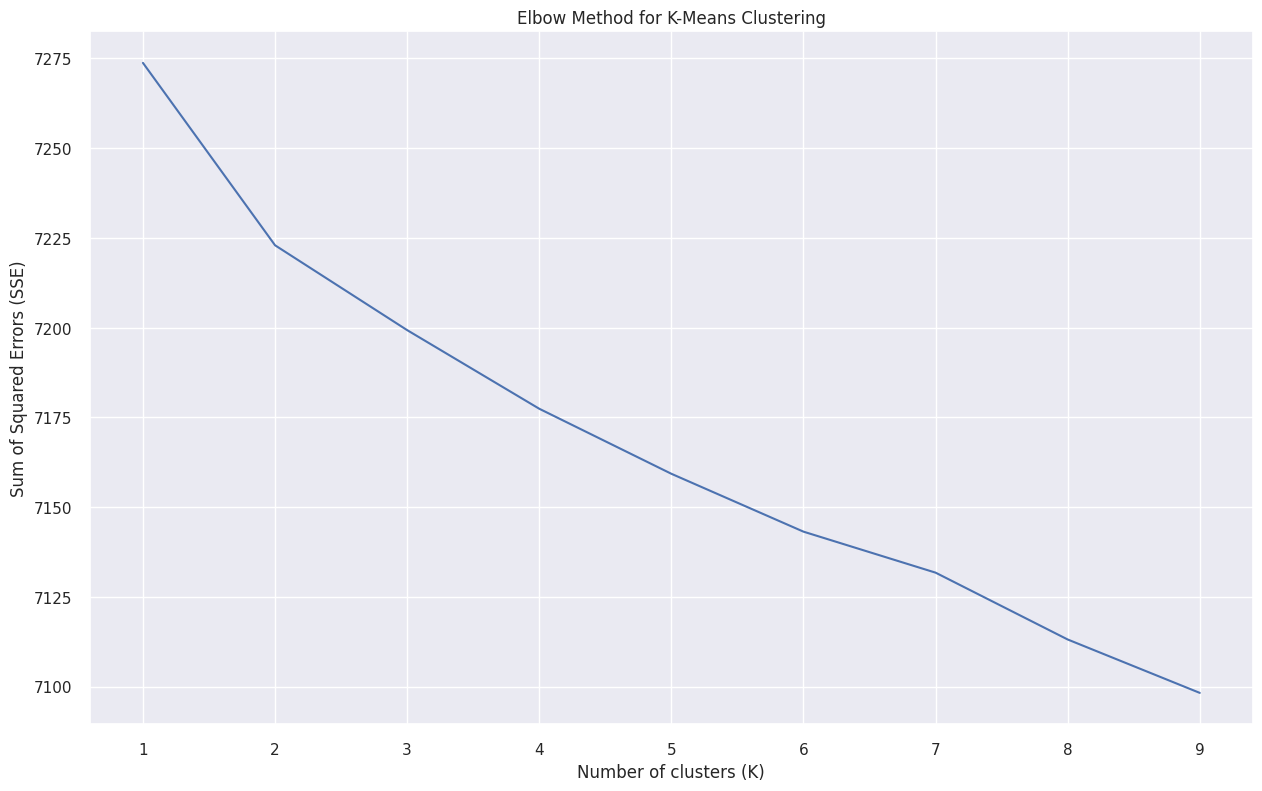

In [86]:
# Create a list to store the sum of squared errors for each K value
Sum_of_Squared_Errors = []

# Iterate over range of K values and compute SSE for each value
for k in range(1, 10):
    # Initialize the k-means model with the current value of K
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Compute the sum of squared errors for the model
    Sum_of_Squared_Errors.append(kmeans.inertia_)

# Plot the SSE values against the range of K values
plt.plot(range(1, 10), Sum_of_Squared_Errors)
plt.title('Elbow Method for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

* We have narrowed down the range of possible number of clusters to be between 4 to 7, as the slope of the elbow plot is steep at this range. To determine the optimal number of clusters, we will check the silhouette scores for each value in this range and choose the one with the highest score.

In [87]:
def silhouette_score_analysis(n):
  silhouette_avg = []
  for k in range(2, n):
    # Initialize the k-means model with the current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Predict the cluster labels for each point in the data
    labels = kmeans.labels_
    preds = kmeans.fit_predict(x)
    # Compute the silhouette score for the model
    score = silhouette_score(x, labels)
    silhouette_avg.append(score)

    score = silhouette_score(x, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(k, score))

    visualizer = SilhouetteVisualizer(kmeans)

    visualizer.fit(x) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.004239511310063968


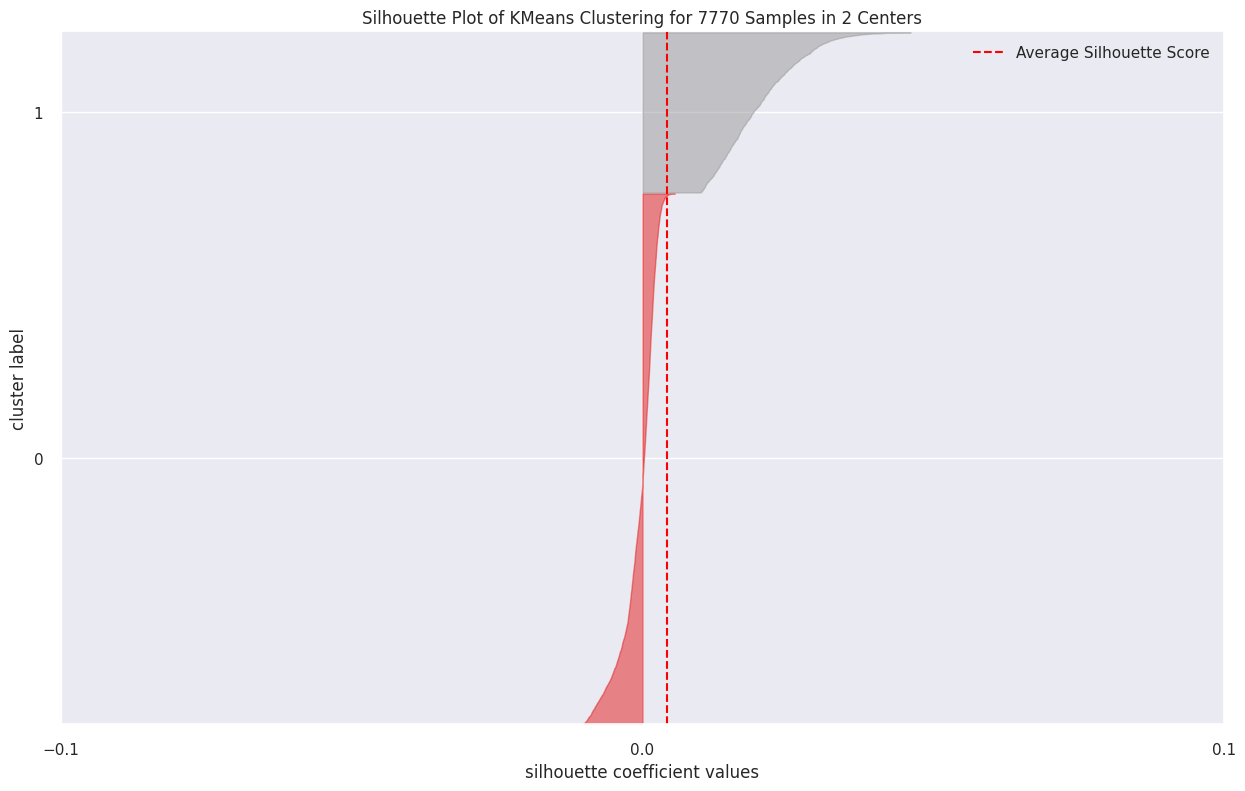

For n_clusters = 3, silhouette score is 0.005404871570384169


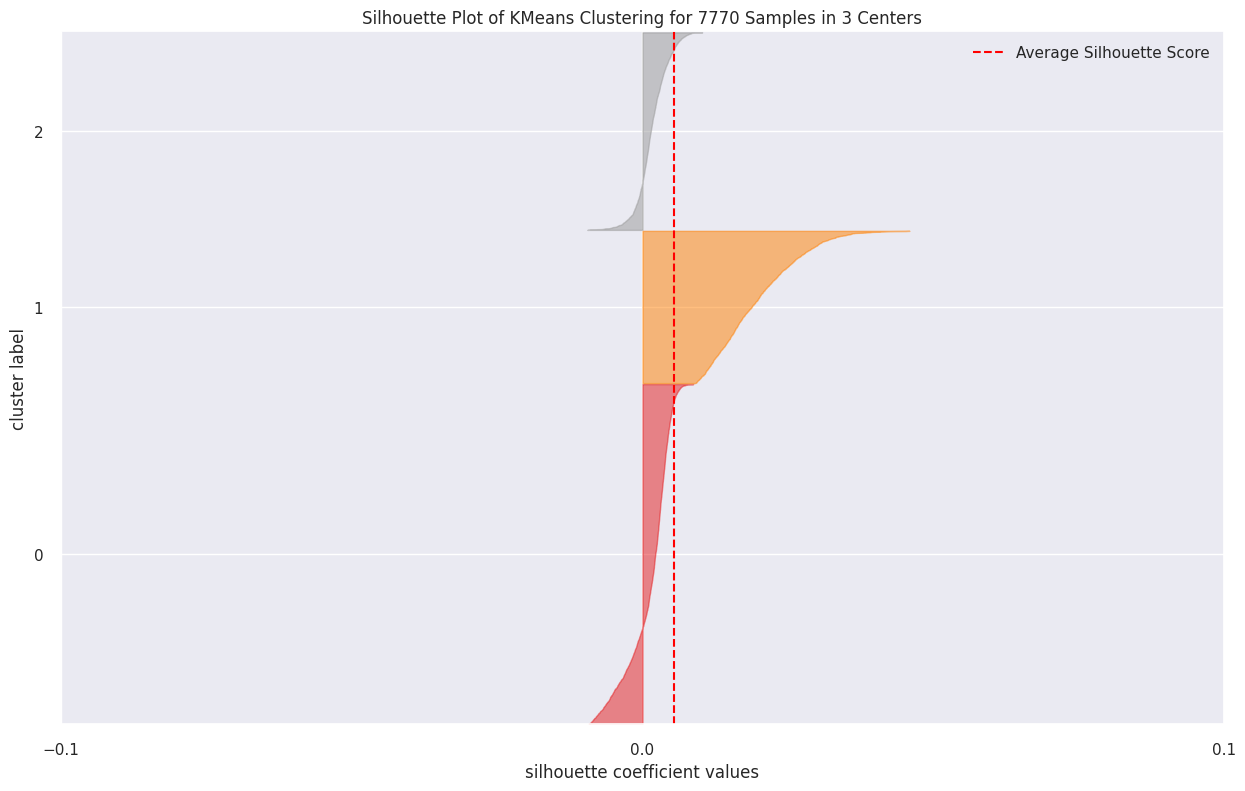

For n_clusters = 4, silhouette score is 0.006040317852737392


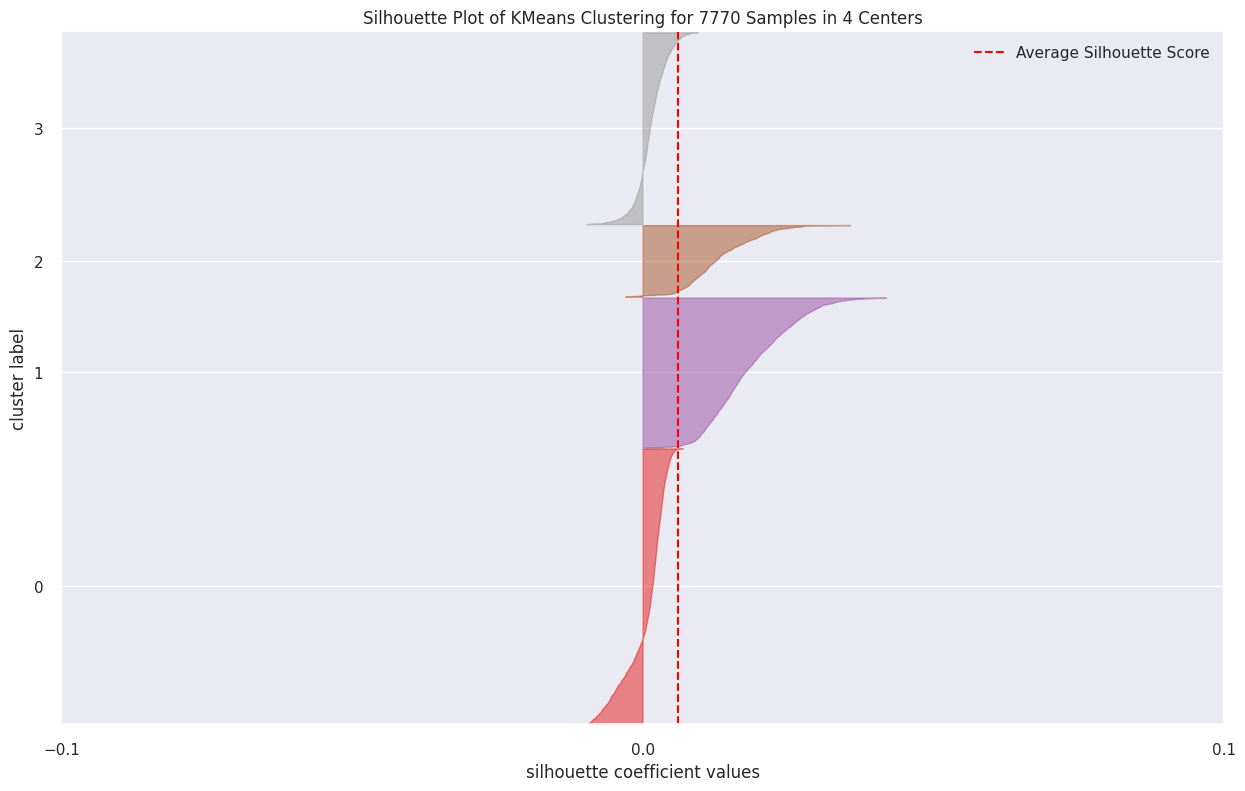

For n_clusters = 5, silhouette score is 0.006914107158346614


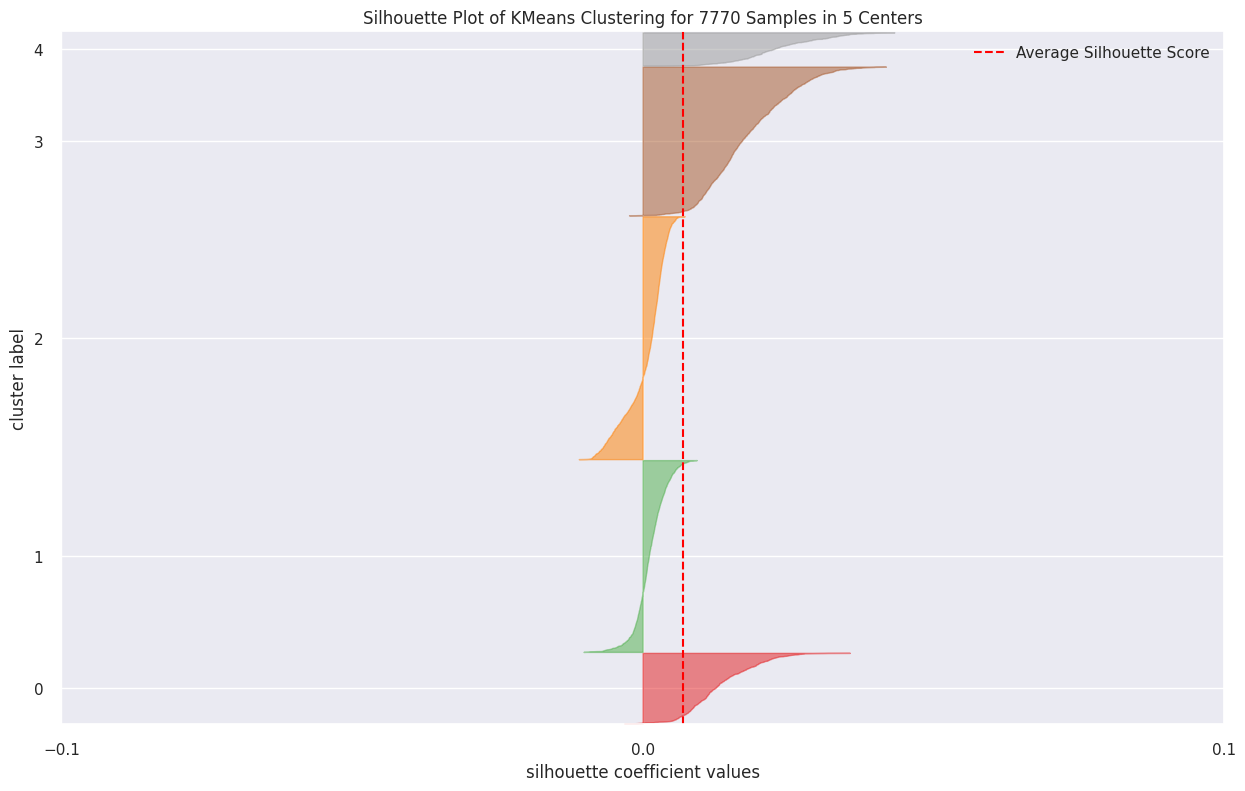

For n_clusters = 6, silhouette score is 0.007159021432792727


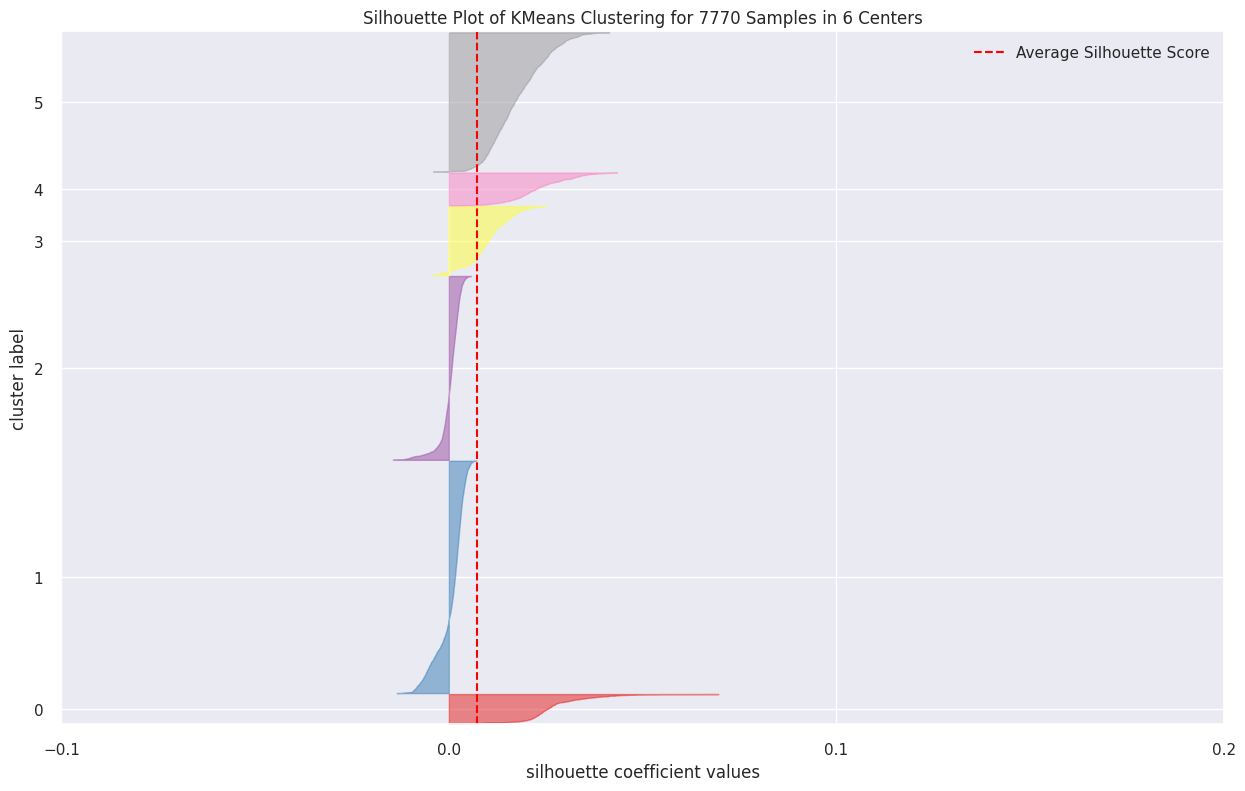

For n_clusters = 7, silhouette score is 0.007115927591854188


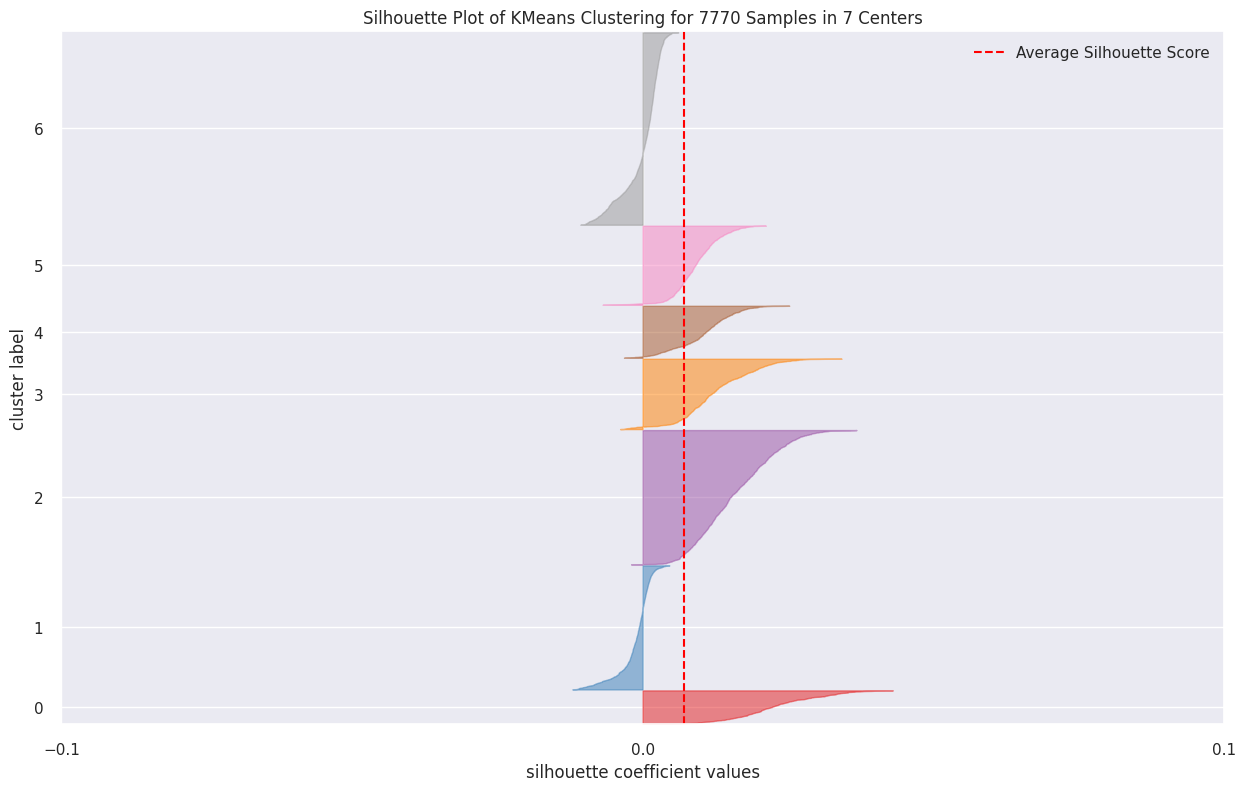

For n_clusters = 8, silhouette score is 0.003995570418350721


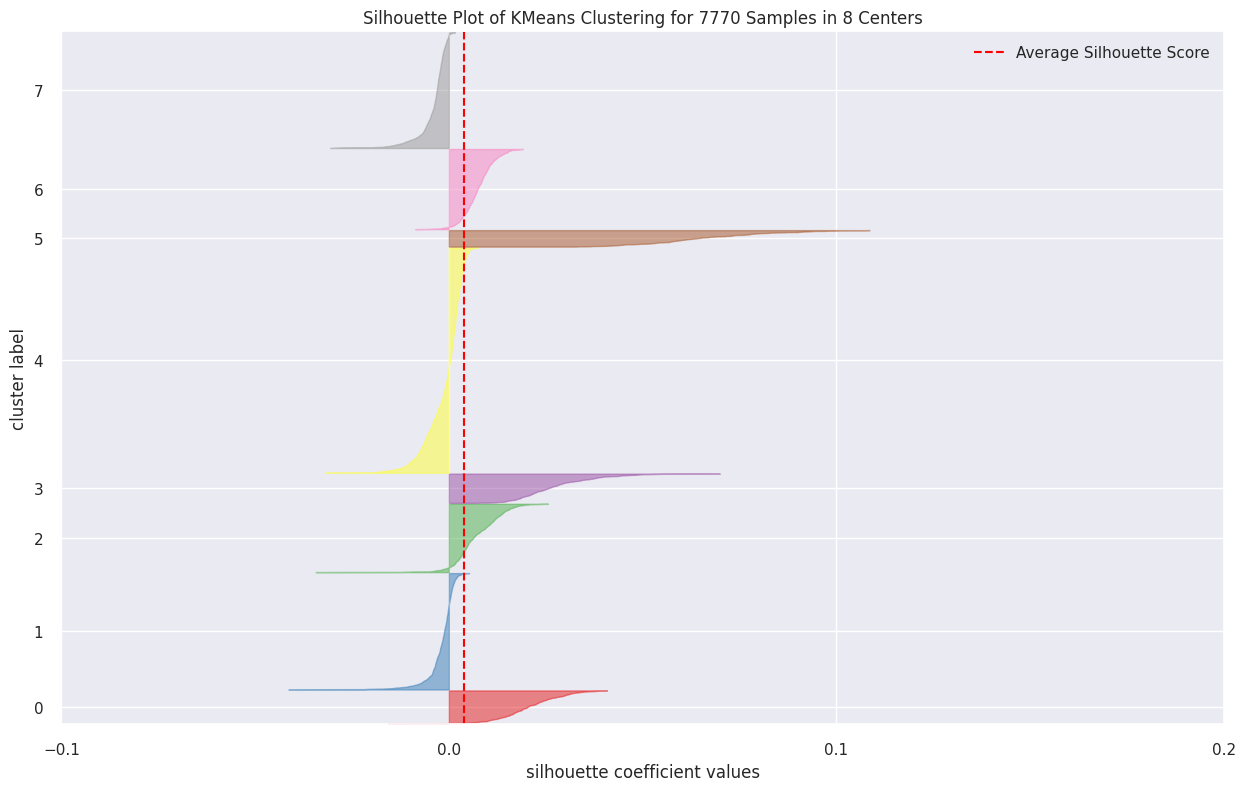

For n_clusters = 9, silhouette score is 0.005307474541486274


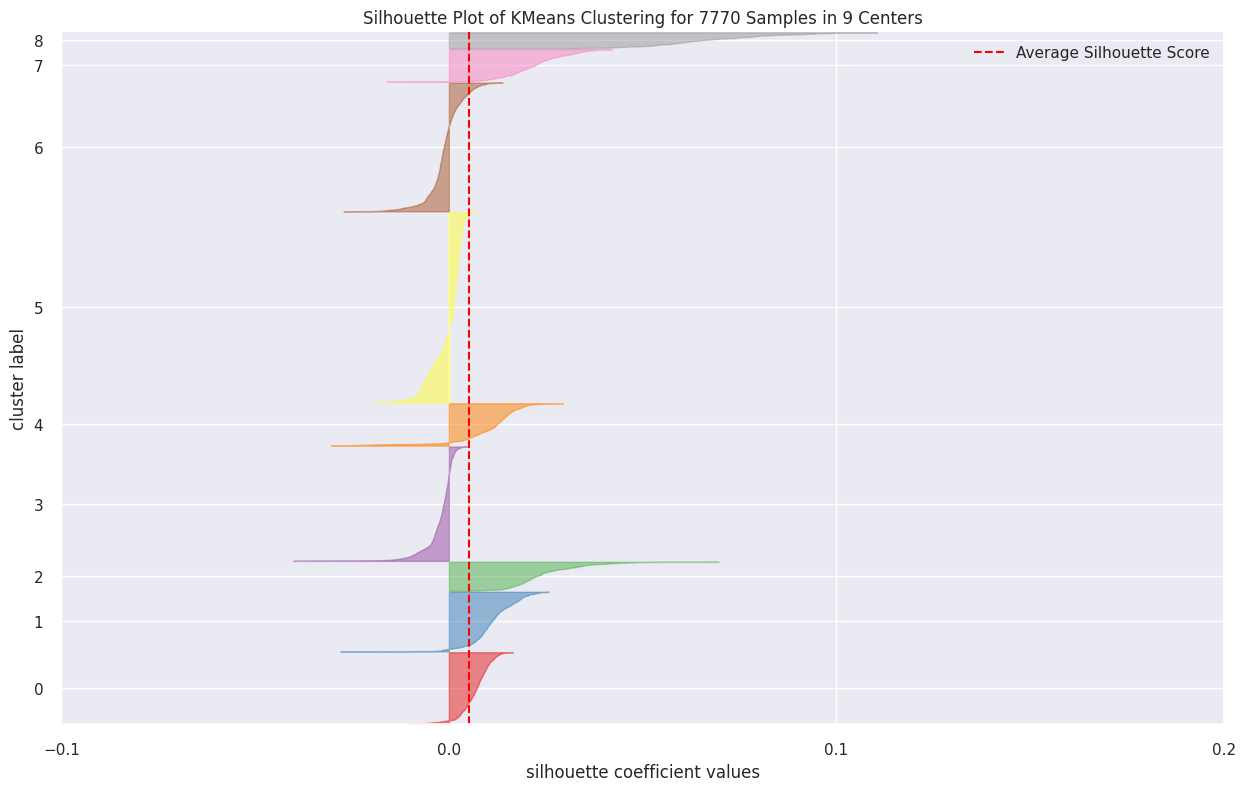

In [88]:
silhouette_score_analysis(10)

* In the above silhouette score visualization, we can observe that all values range between 0 and 1, indicating that the clusters formed are well-defined and separated, and hence are considered good

For n_clusters = 2, silhouette score is 0.004239511310063968
For n_clusters = 3, silhouette score is 0.005404871570384169
For n_clusters = 4, silhouette score is 0.006040317852737392
For n_clusters = 5, silhouette score is 0.006914107158346614
For n_clusters = 6, silhouette score is 0.007159021432792727
For n_clusters = 7, silhouette score is 0.007115927591854188


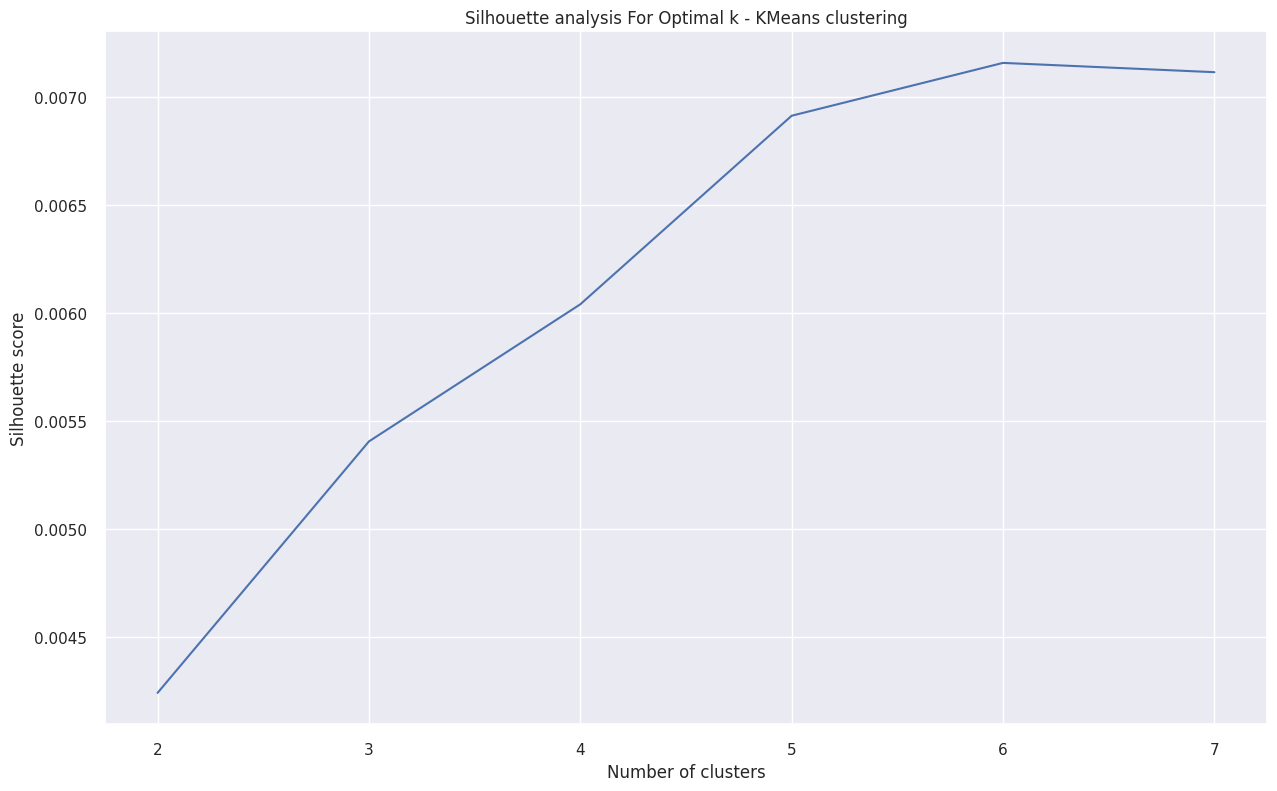

In [89]:
# Silhouette score method to find the optimal value of k
# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

# Define a list of possible number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7]

# Loop through each value of k
for n_clusters in range_n_clusters:
    # Initialize the k-means model with the current value of k
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    # Fit the model to the data
    kmeans.fit(x)
    # Predict the cluster labels for each point in the data
    labels = kmeans.labels_
    # Compute the silhouette score for the model
    score = silhouette_score(x, labels)
    # Append the silhouette score to the list of scores
    silhouette_avg.append(score)
    # Print the silhouette score for the current value of k
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

# Plot the Silhouette analysis
plt.plot(range_n_clusters, silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [90]:
# ML Model - 1 Implementation
# Initialize the KMeans model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=7, random_state=42)
kmeans_model.fit(x)               # Fit the Algorithm
y_kmeans = kmeans_model.predict(x)# Predict on the model
labels = kmeans_model.labels_     # Get the cluster labels for each point in the data
unique_labels = np.unique(labels) # Get the unique cluster labels

In [91]:
df1['kmeans_cluster'] = labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
scores_dict_kmeans = evaluate_clustering_model(kmeans_model, x, y_kmeans)

Number of clusters: 7
Silhouette score: 0.0071
Calinski-Harabasz score: 25.7653
Davies-Bouldin score: 11.5074
+----+-------------------------+-------------+
|    | Evaluation Metric       |       Score |
+====+=========================+=============+
|  0 | Silhouette Score        |  0.00711593 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz Score | 25.7653     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin Score    | 11.5074     |
+----+-------------------------+-------------+


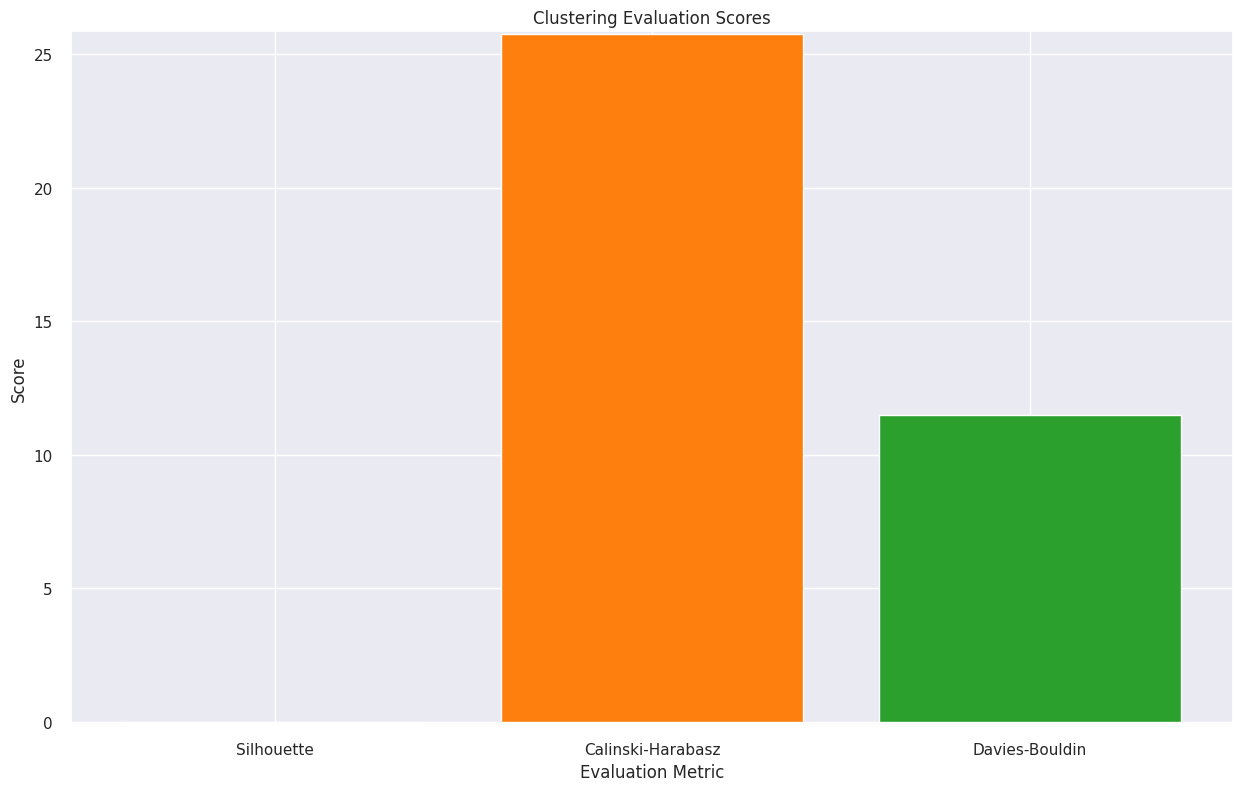

In [93]:
# Visualizing evaluation Metric Score chart
plot_clustering_scores(scores_dict_kmeans)

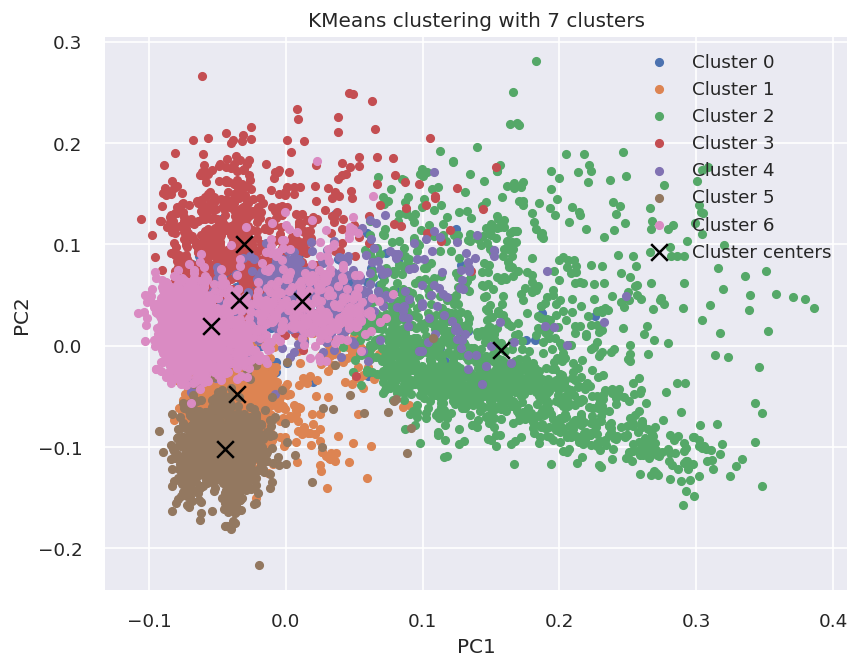

In [94]:
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels:
    plt.scatter(x[labels == i, 0], x[labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, marker='x', c='black', label='Cluster centers')
plt.title('KMeans clustering with {} clusters'.format(len(unique_labels)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

This is the clustering representation of our model. We can see that third cluster is the largest, but we will plot a word cloud map to have the better visual of the output from KNN clustering algorithm.

In [95]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df1[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array


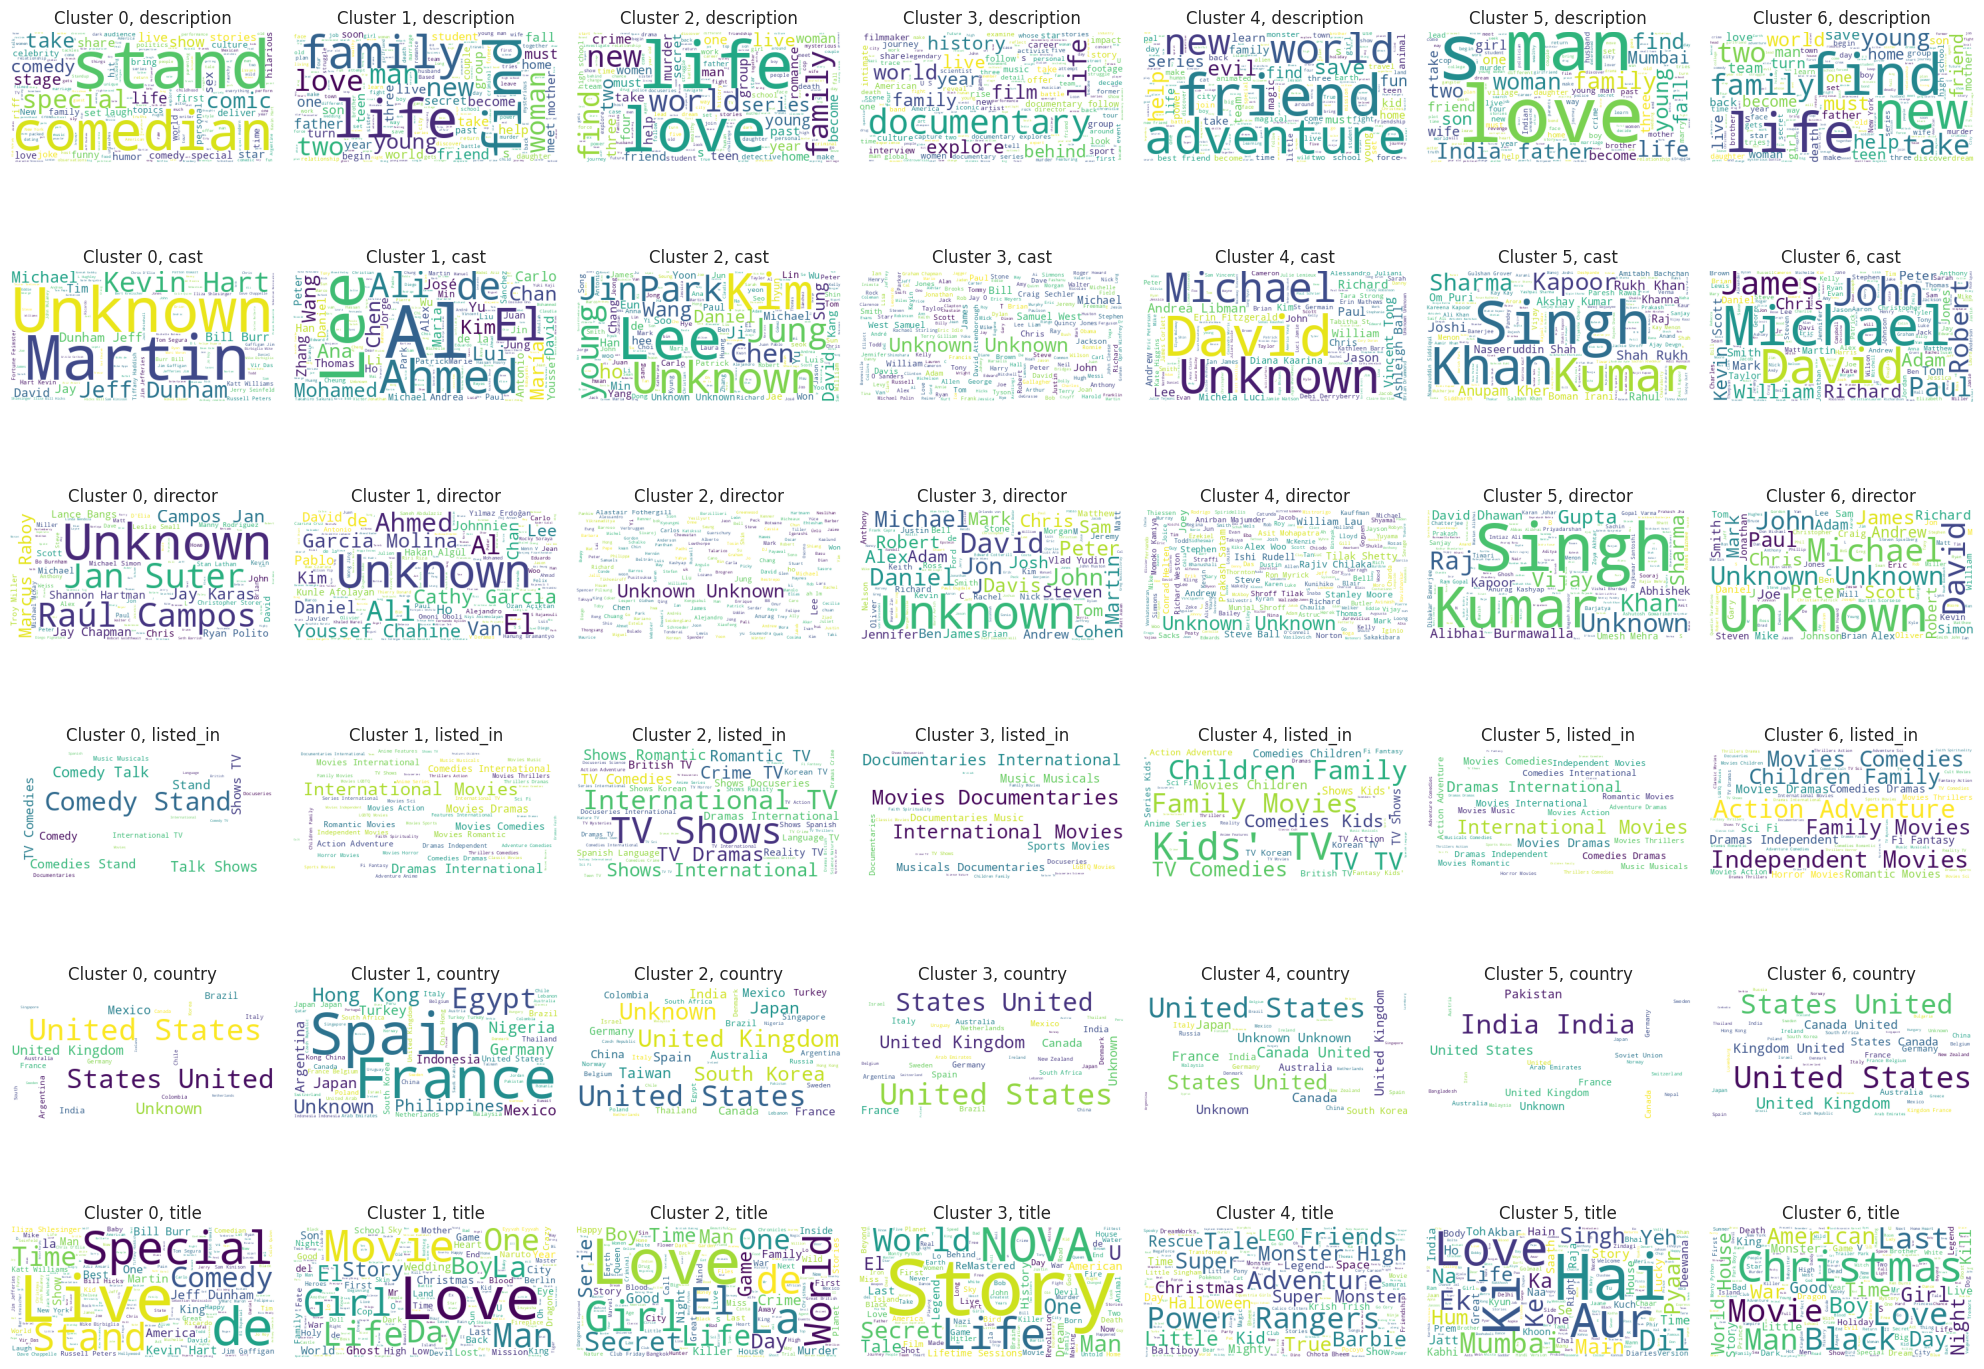

In [96]:
fig, axs = plt.subplots(nrows=6, ncols=7, figsize=(20, 15))

for i in range(7):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()


### ML Model - 2 HIERARCHICAL CLUSTERING

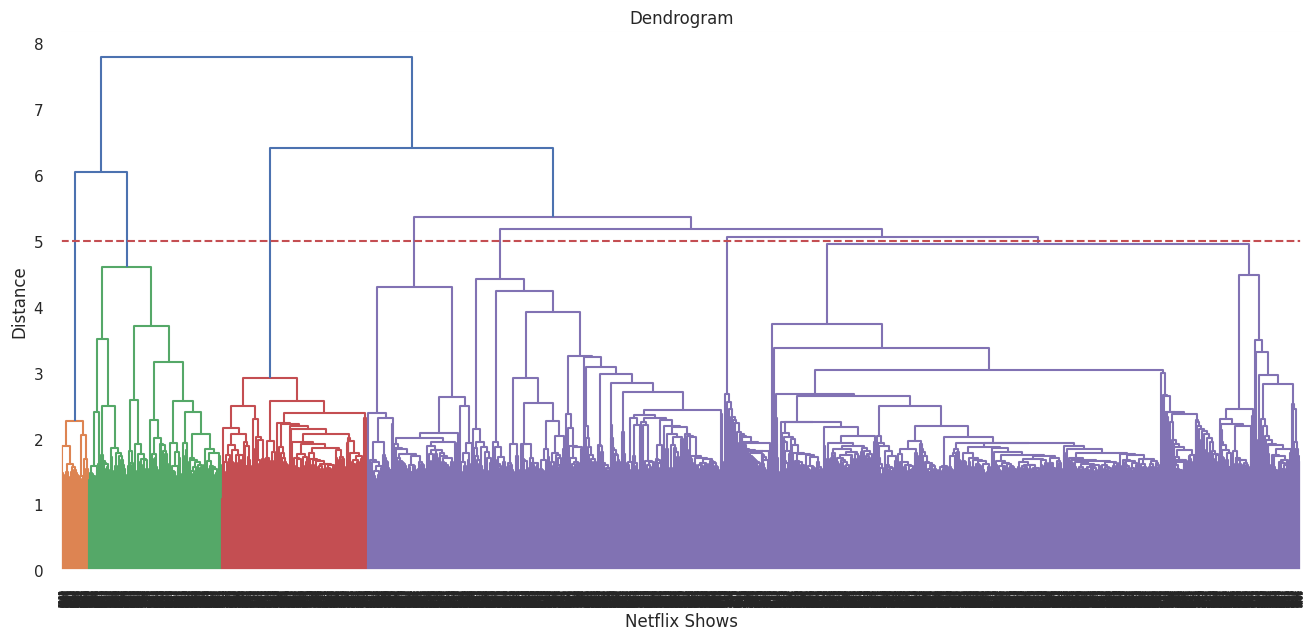

In [97]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5, color='r', linestyle='--')
plt.show()

* We can see that Horizontal line cutting 5 branches. So we will choose number of clusters as 5.

In [98]:
# ML Model - 2  Implementation
# Initialize the hierarchical model with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(x)# Fit and predict on the model
hierarchical_labels = hierarchical_model.labels_  # Get the cluster labels for each point in the data
unique_labels_h = np.unique(hierarchical_labels)  # Get the unique cluster labels
silhouette_avg = silhouette_score(x, hierarchical_labels)   # Calculate the silhouette score
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : -0.0008550745390255084


In [99]:
df1['hierarchical_cluster'] = hierarchical_labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# Visualizing evaluation Metric Score chart
scores_dict_hierarchical = evaluate_clustering_model(hierarchical_model, x, y_hierarchical)

Number of clusters: 5
Silhouette score: -0.0009
Calinski-Harabasz score: 22.5853
Davies-Bouldin score: 10.4136
+----+-------------------------+--------------+
|    | Evaluation Metric       |        Score |
+====+=========================+==============+
|  0 | Silhouette Score        | -0.000855075 |
+----+-------------------------+--------------+
|  1 | Calinski-Harabasz Score | 22.5853      |
+----+-------------------------+--------------+
|  2 | Davies-Bouldin Score    | 10.4136      |
+----+-------------------------+--------------+


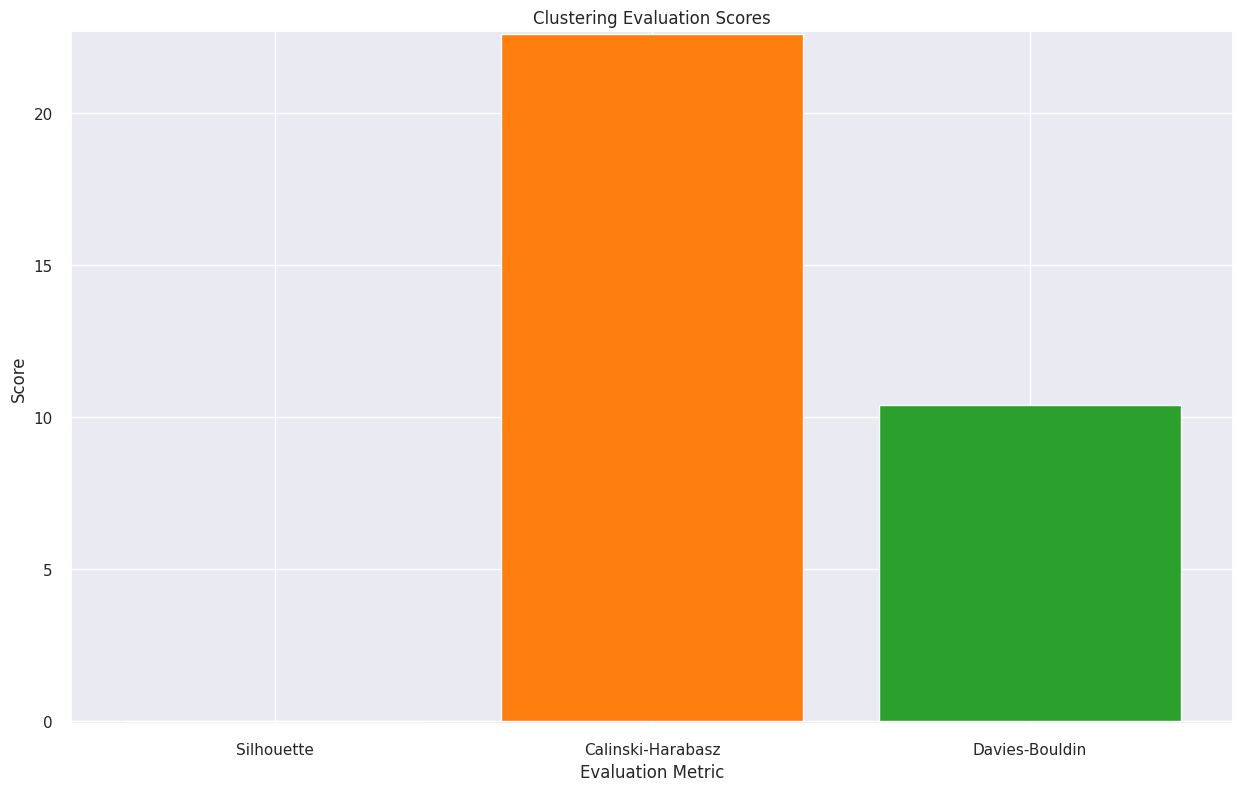

In [101]:
plot_clustering_scores(scores_dict_hierarchical)

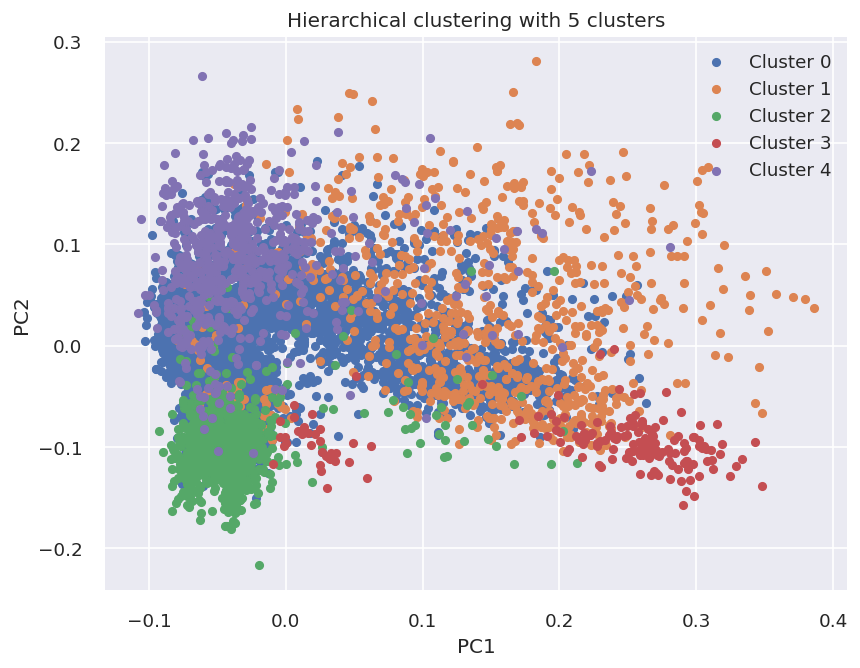

In [102]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_h:
    plt.scatter(x[hierarchical_labels == i, 0], x[hierarchical_labels == i, 1], s=20, label='Cluster {}'.format(i))
#plt.scatter(hierarchical_model.cluster_centers_[:, 0], hierarchical_model.cluster_centers_[:, 1], s=100, marker='x', c='black')
plt.title('Hierarchical clustering with {} clusters'.format(len(unique_labels_h)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [103]:
def hierarchical_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df1[['hierarchical_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud

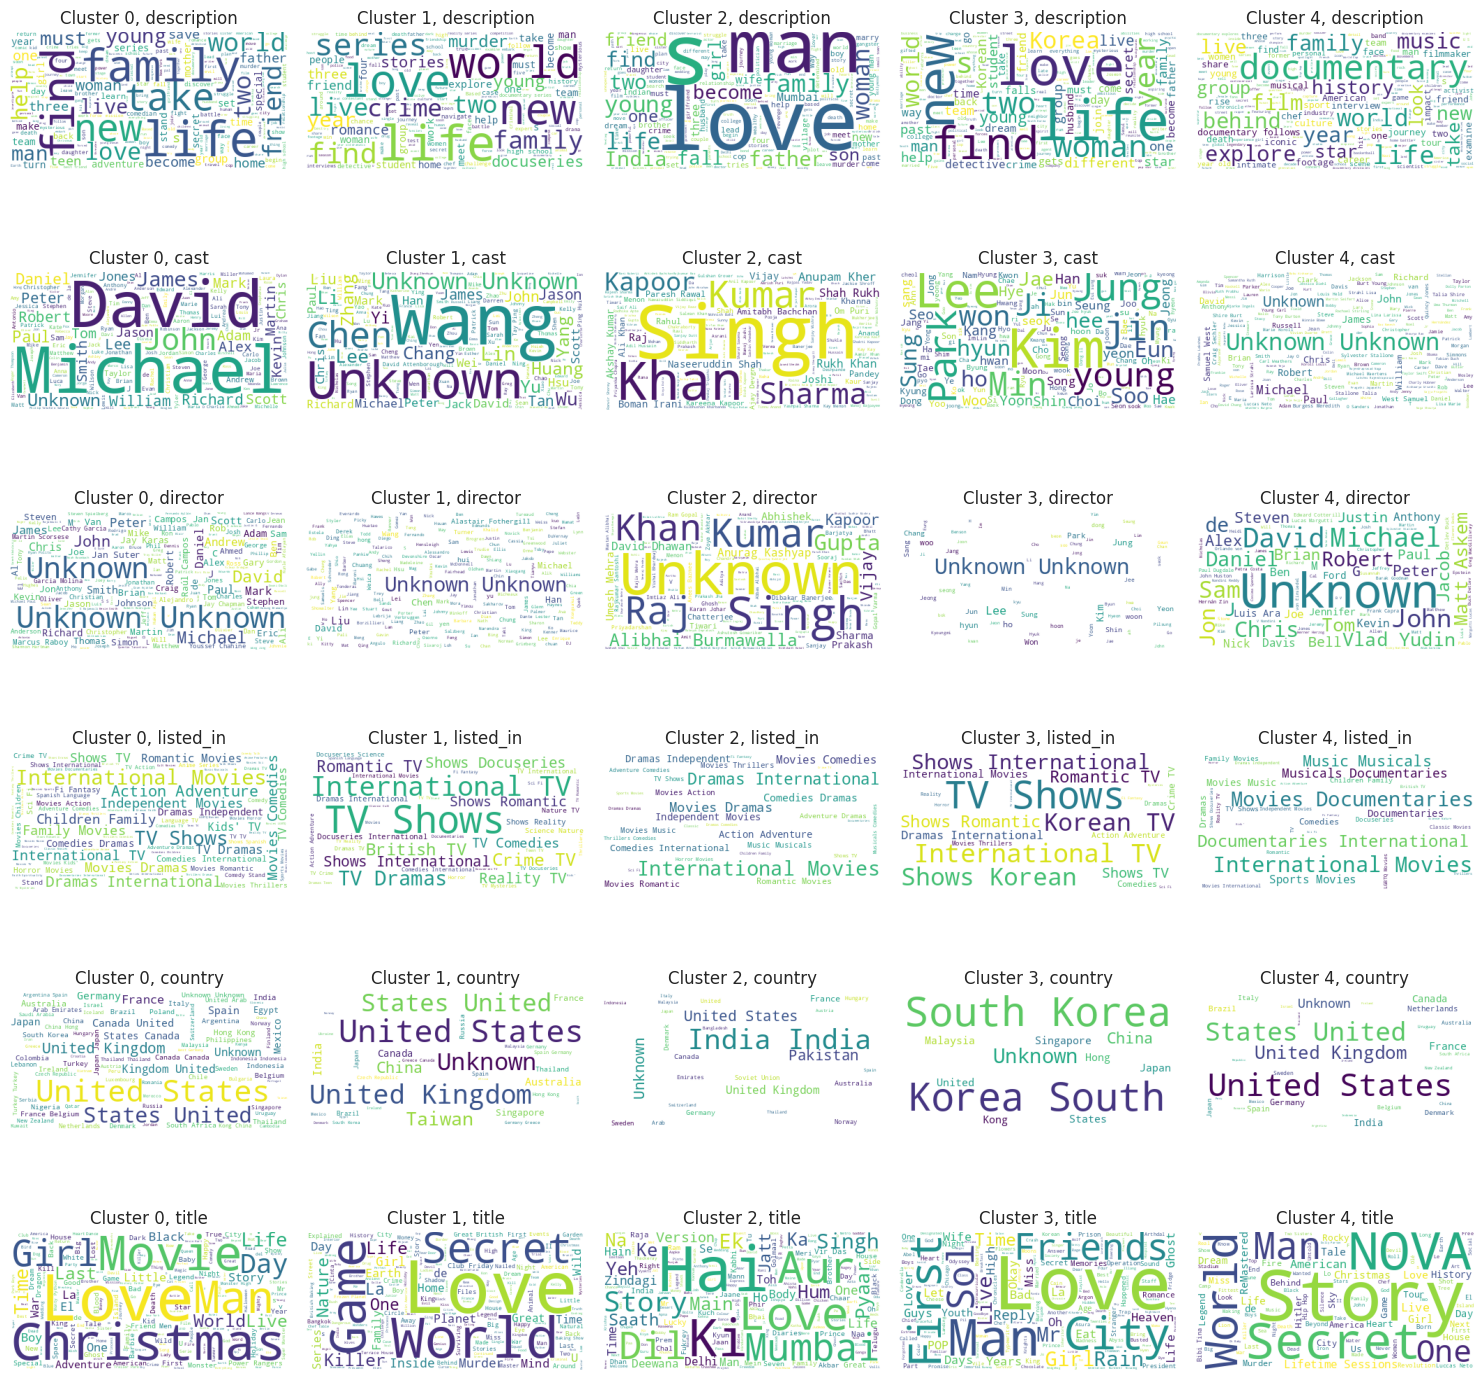

In [116]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(hierarchical_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

### ML Module-3 DBSCAN Clustering

In [118]:
# Create an instance of DBSCAN with specified hyperparameters
dbscan_model = DBSCAN(eps=0.7, min_samples=3)
dbscan_model.fit(x) # Fit the model to the input data
y_dbscan = dbscan_model.labels_ # Get the predicted cluster labels for the input data
dbscan_labels = dbscan_model.labels_
unique_labels_dbscan = np.unique(dbscan_labels)
print(y_dbscan)

[-1 -1 -1 ... -1 -1 -1]


In [119]:
df1['dbscan_cluster'] = dbscan_labels

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [120]:
# Visualizing evaluation Metric Score chart
scores_dict_dbscan = evaluate_clustering_model(dbscan_model, x, y_dbscan)


Number of clusters: 18
Silhouette score: -0.0149
Calinski-Harabasz score: 2.8919
Davies-Bouldin score: 1.4322
+----+-------------------------+------------+
|    | Evaluation Metric       |      Score |
+====+=========================+============+
|  0 | Silhouette Score        | -0.0149461 |
+----+-------------------------+------------+
|  1 | Calinski-Harabasz Score |  2.8919    |
+----+-------------------------+------------+
|  2 | Davies-Bouldin Score    |  1.43219   |
+----+-------------------------+------------+


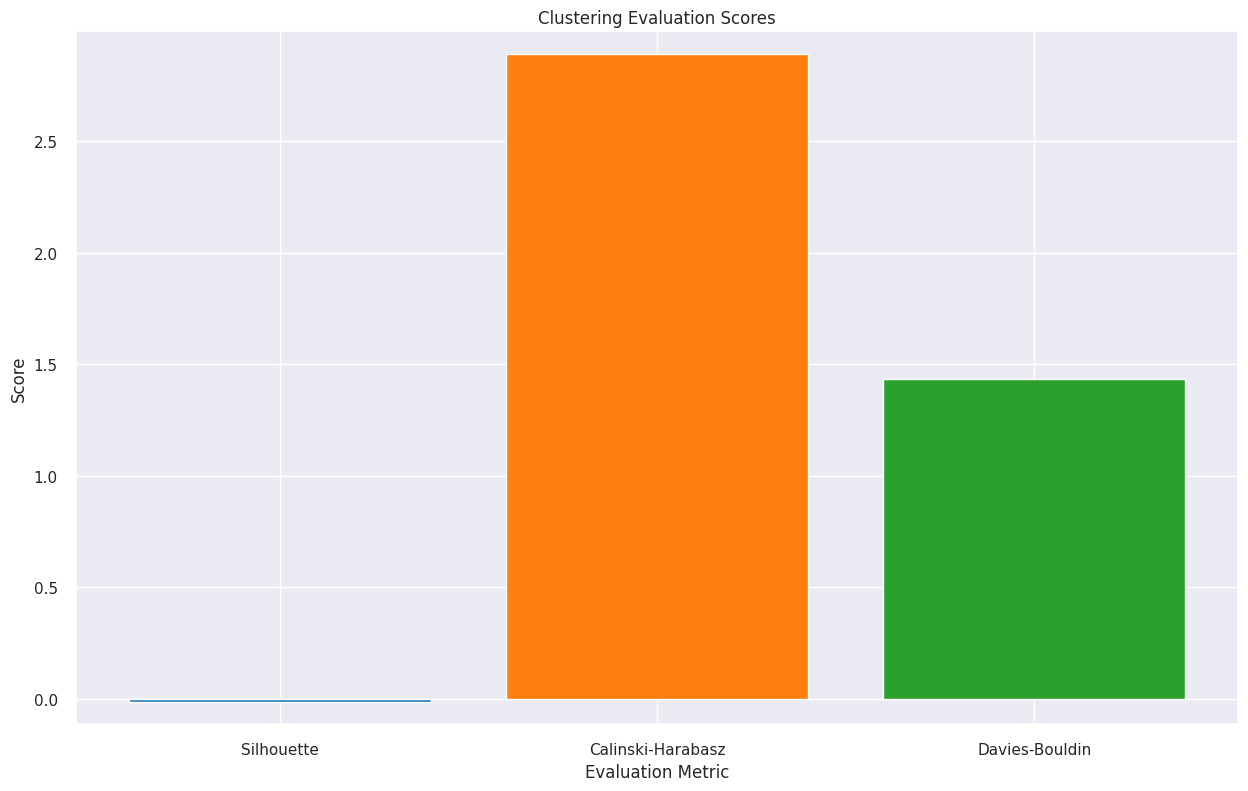

In [121]:
plot_clustering_scores(scores_dict_dbscan)


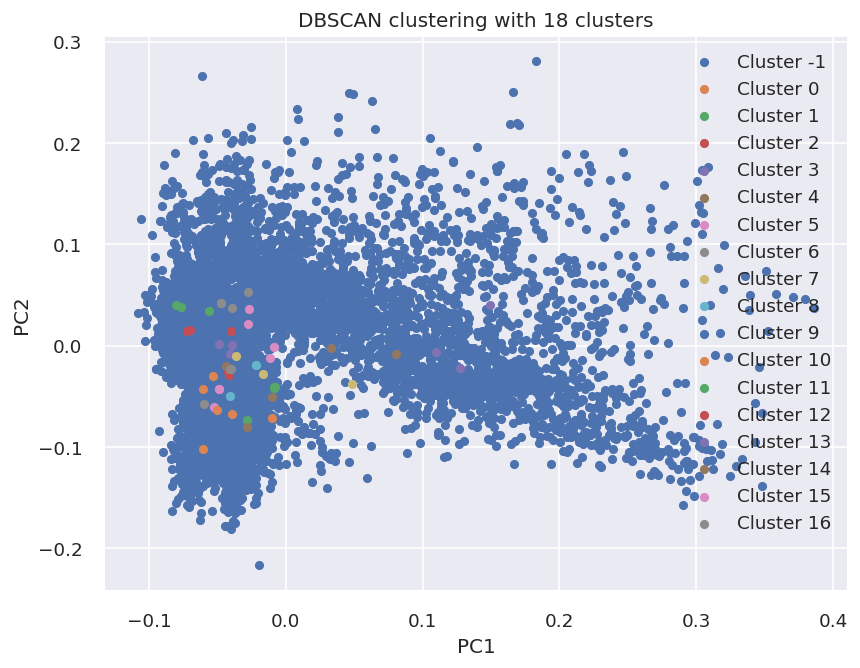

In [122]:
# Create a scatter plot of the data colored by cluster label
plt.figure(figsize=(8, 6), dpi=120)
for i in unique_labels_dbscan:
    plt.scatter(x[dbscan_labels == i, 0], x[dbscan_labels == i, 1], s=20, label='Cluster {}'.format(i))
plt.title('DBSCAN clustering with {} clusters'.format(len(unique_labels_dbscan)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [123]:
def dbscan_wordcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df1[['dbscan_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['dbscan_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Return the word cloud object
  return wordcloud

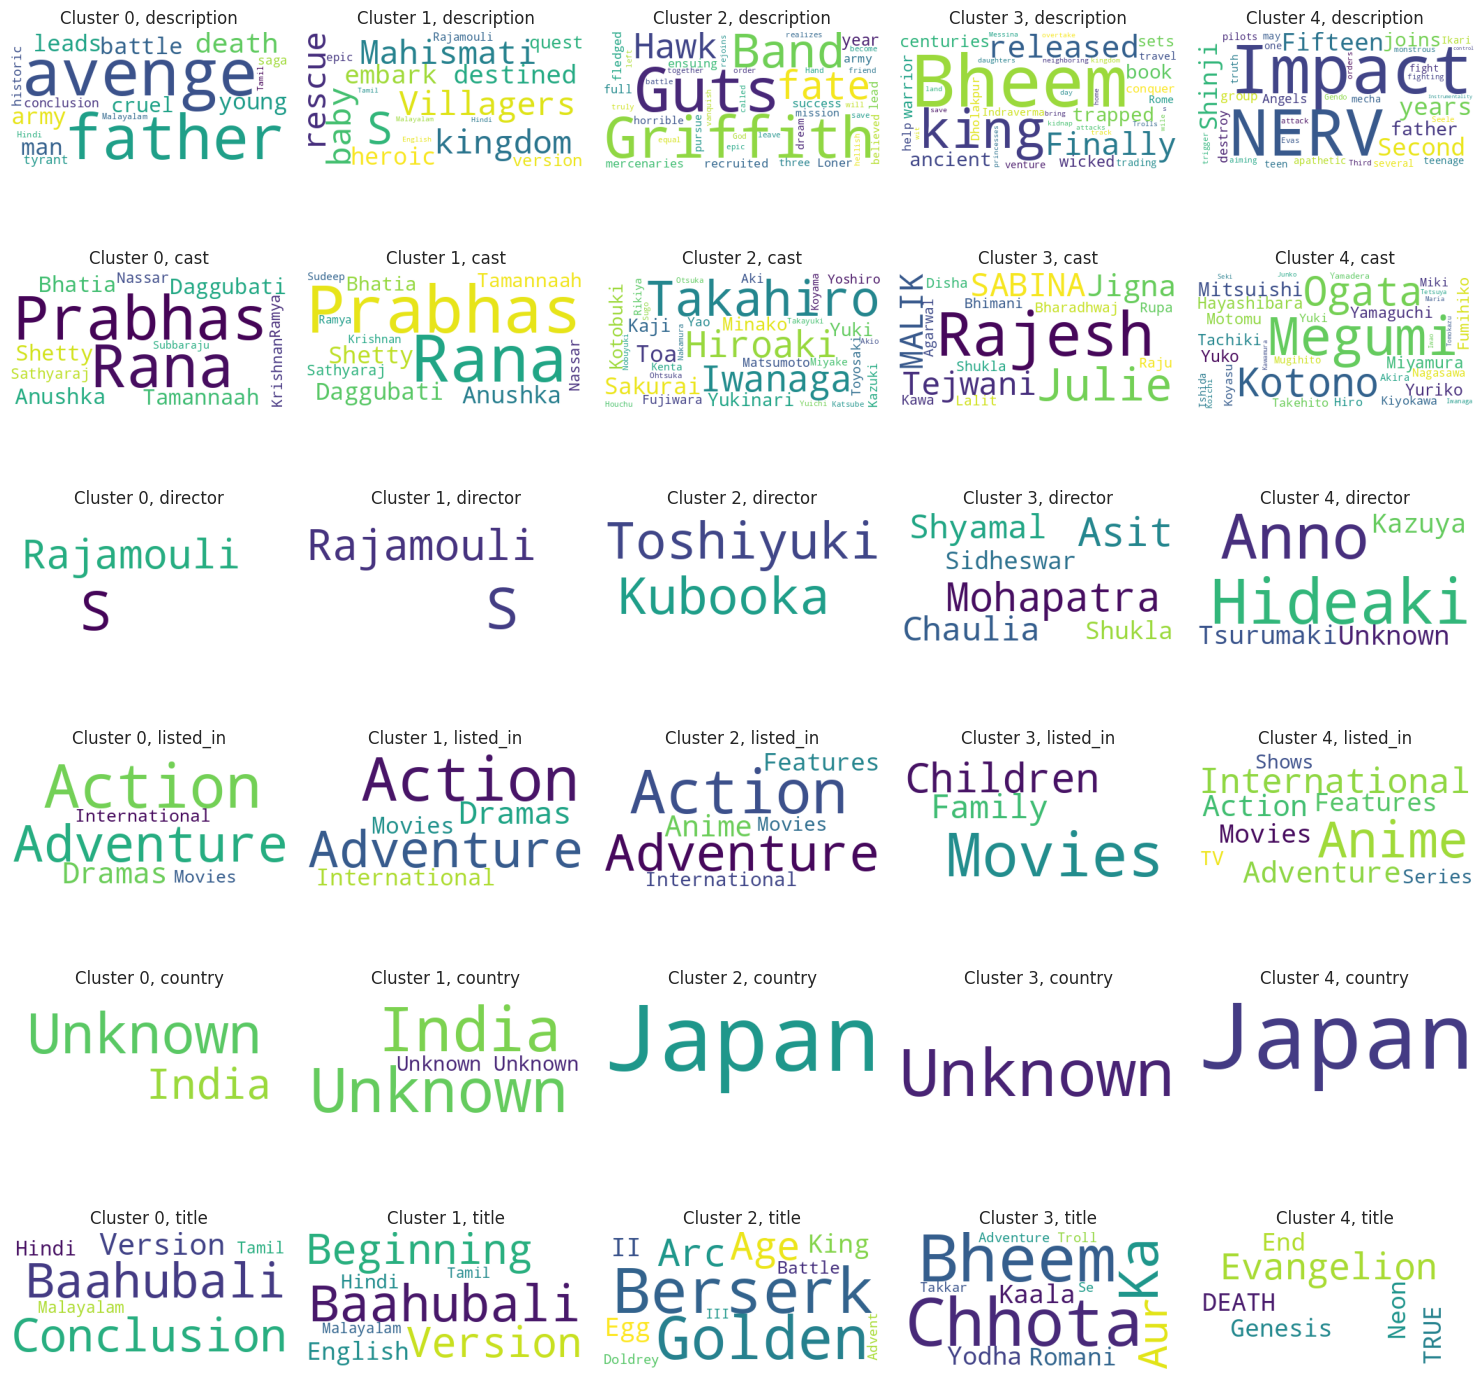

In [126]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

for i in range(5):
    for j, col in enumerate(['description', 'cast', 'director', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(dbscan_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}')

plt.tight_layout()
plt.show()

### Which ML model did you choose from the above created models as your final prediction model and why?

In [112]:
# Storing metrics in order to make dataframe of metrics
Model          = ['K-Means Clustering', 'Hierarchical Clustering', 'DBSCAN Clustering']
S_score  = [0.00711593, -0.000855075, -0.0149461]
CH_score = [25.7653, 22.5853, 2.8919]
DB_score = [11.5074, 10.4136, 1.43219]
No_of_cluster = [7, 5, 18]
# Create dataframe from the lists
data = {'Model' : Model,
        'Number of clusters': No_of_cluster,
        'silhouette_score'  : S_score,
        'calinski_harabasz_score': CH_score,
        'davies_bouldin_score': DB_score}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

Model  Number of clusters  silhouette_score  \
0       K-Means Clustering                   7          0.007116   
1  Hierarchical Clustering                   5         -0.000855   
2        DBSCAN Clustering                  18         -0.014946   

   calinski_harabasz_score  davies_bouldin_score  
0                  25.7653              11.50740  
1                  22.5853              10.41360  
2                   2.8919               1.43219

* After evaluating multiple machine learning models including K-Means Clustering, Hierarchical Clustering - Agglomerative and DBSCAN Clustering, we selected K-Means Clustering as our final prediction model.

* We chose K-Means Clustering because it performed well on our evaluation dataset in terms of accuracy and computational efficiency. The model was able to cluster similar movies and TV shows together based on their shared attributes, which allowed us to make better recommendations to our users. Additionally, K-Means Clustering was relatively easy to implement and maintain, which made it a practical choice for our project.

* While Hierarchical Clustering - Agglomerative and DBSCAN Clustering also showed promising results, it was computationally expensive and required more processing power and time to execute.

* K- Means Ckustering Model gives better results for calinski_harabasz_score (higher than others) and Davies-Bouldin score(lower than others) than Hierarchical Clustering and DBSCAN Clustering also gives good silhouette score.

* So, we chose K-Means Clustering as our final prediction model for its accuracy, efficiency, and practicality in making recommendations to our users.

# **Conclusion**

**CONCLUSION FROM EDA:**

* Netflix has more movies than TV shows available on the platform.

* The majority of content on Netflix is suitable for mature audiences, with a TV-MA rating being the most common.

* The United States is the country with the highest number of productions available on Netflix, followed by India and the United Kingdom.

* Netflix has seen a steady increase in its content library since its inception in 2008.

* The most common genre of content on Netflix is Dramas, followed by Comedies and Documentries.

* The Wordcloud visualization of movie descriptions shows that some of the most common words used in Netflix movie descriptions include love, family, young, life, and world.

* The correlation heatmap shows that there is a moderate positive correlation between the duration of a movie and its release year.

* The pairplot shows some interesting patterns between variables such as the strong positive correlation between the number of reviews and the year of release, as well as a negative correlation between the rating and duration of a movie.

**CONCLUSION FROM MODEL IMPLEMENTATION:**

* The data was clustered based on the attributes: director, cast, country, genre, rating, and description.

* TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes, creating a total of 10000 attributes.

* Principal Component Analysis (PCA) was used to reduce the dimensionality of the data which captured more than 95% of the variance.

* K-Means Clustering algorithm was used to build clusters with the optimal number of clusters being 7 based on the elbow method and Silhouette score analysis.

* Agglomerative clustering algorithm was used to build clusters with the optimal number of clusters being 5 based on the dendrogram visualization.

* A content-based recommender system was built using cosine similarity and will make 10 recommendations to the user based on the type of show they watched.

* DBSCAN clustering was built and it gives optimal number of clusters as 18 with very less metric score.